In [16]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt
from astropy import stats
%matplotlib inline

In [14]:
def mad(data, axis=None, func=None, ignore_nan=True):
    """ Calculate the median absolute deviation."""
    if type(data) is not np.ndarray: raise ValueError("data must be a numpy array")    
    return 1.4826 * astropy.stats.median_absolute_deviation(data,axis=axis,func=func,ignore_nan=ignore_nan)

def gaussian(x, amp, cen, sig):
    return amp*np.exp(-(x-cen)**2 / sig**2)

In [3]:
cat = Table.read("apogee_bulge.fits.gz", 1)

# Remove trailing spaces
for i in range(len(cat)):
    cat['FIELD'][i] = cat['FIELD'][i].strip()
uniqueFields = np.unique(cat["FIELD"])

#postive longitude is left side of buldge

#use help(INSERT COMMAND HERE) to get help on things

C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


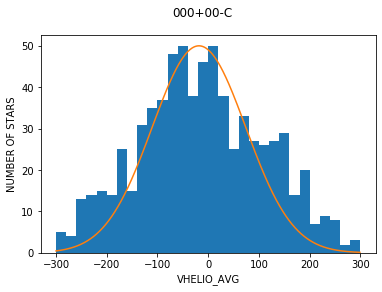

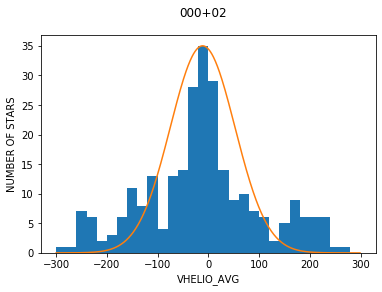

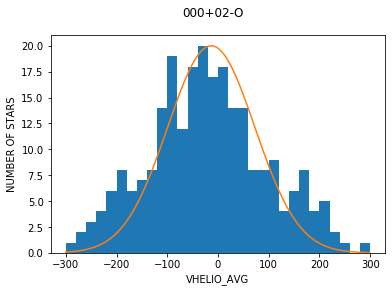

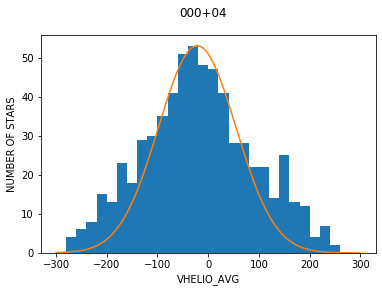

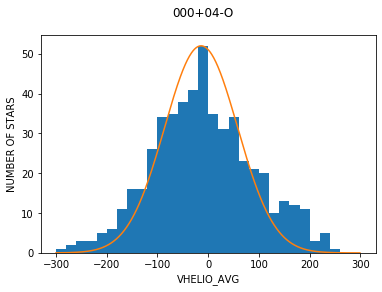

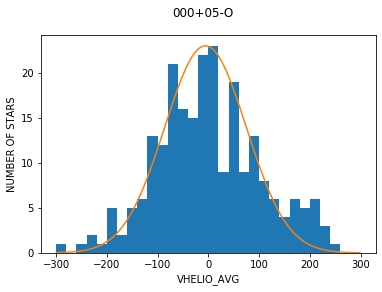

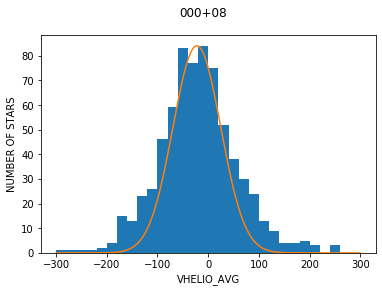

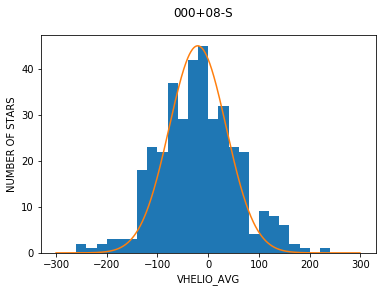

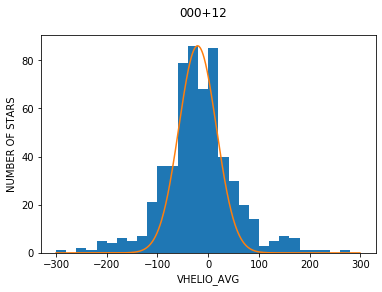

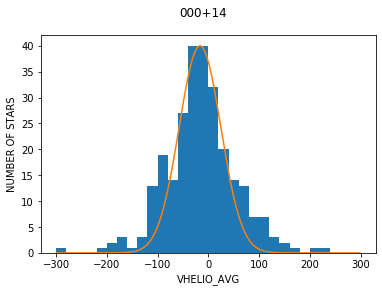

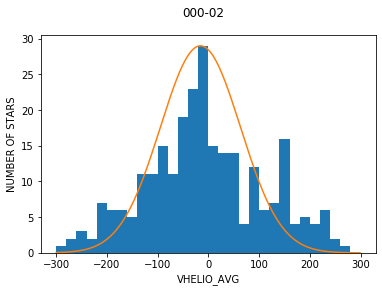

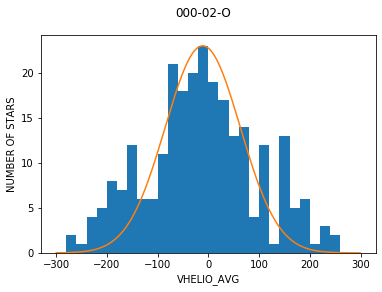

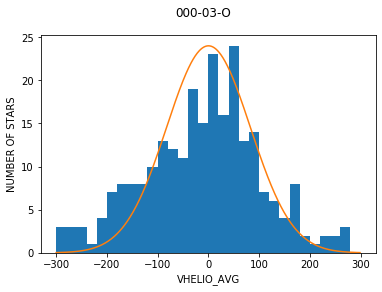

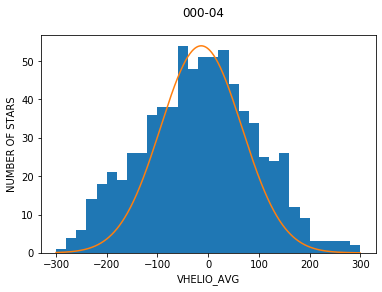

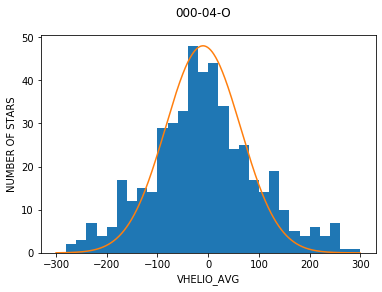

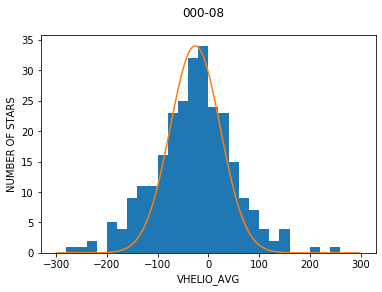

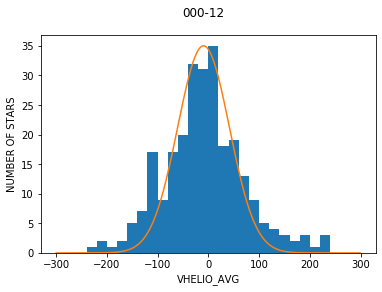

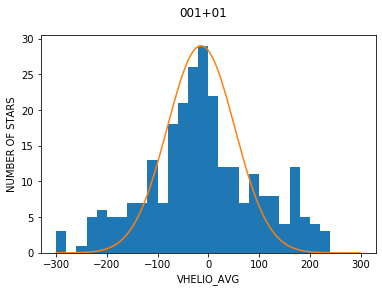

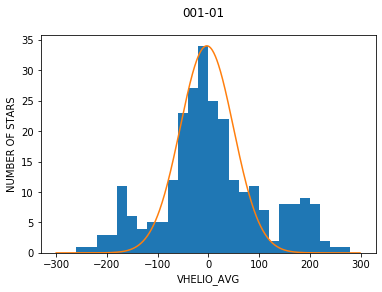

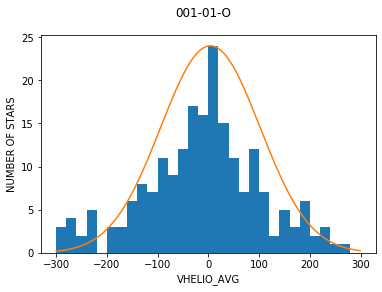

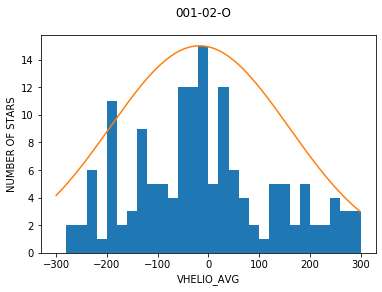

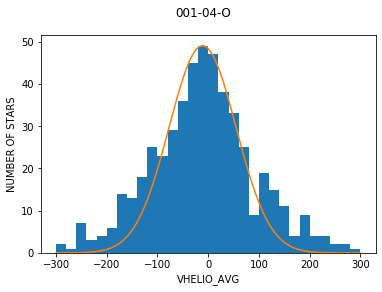

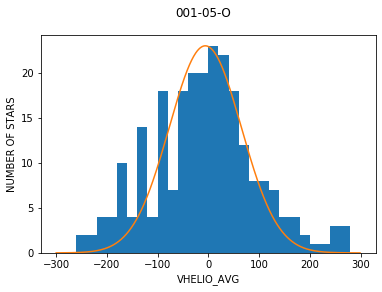

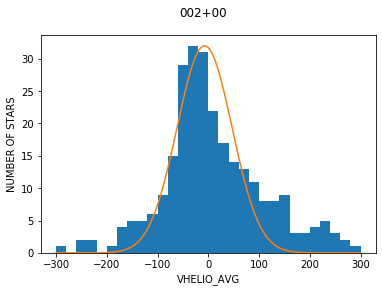

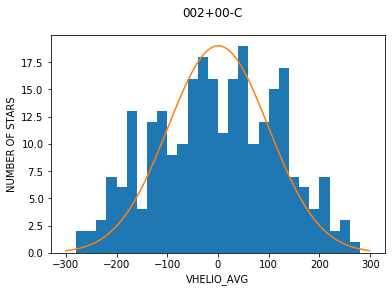

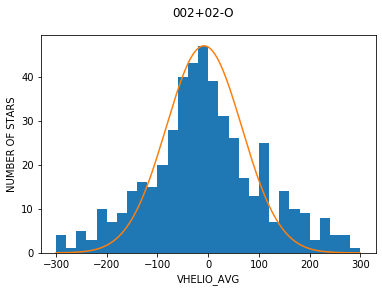

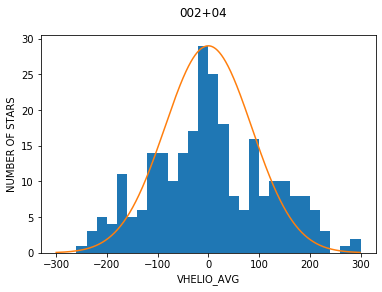

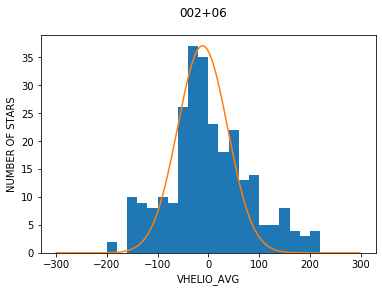

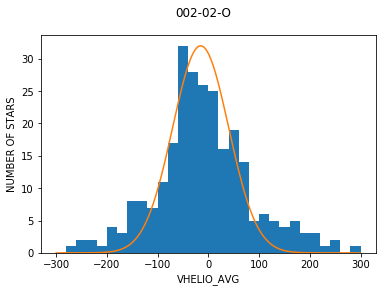

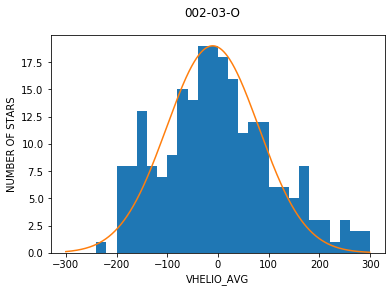

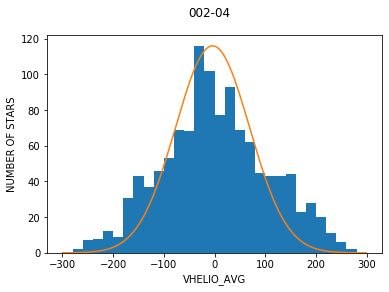

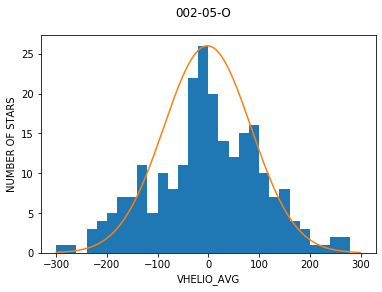

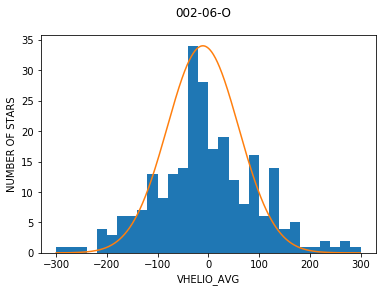

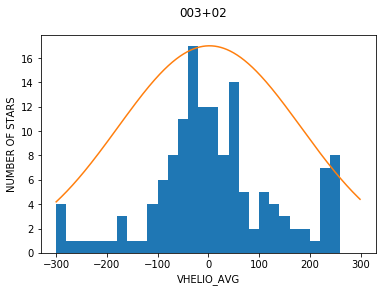

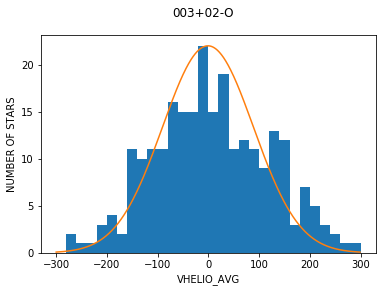

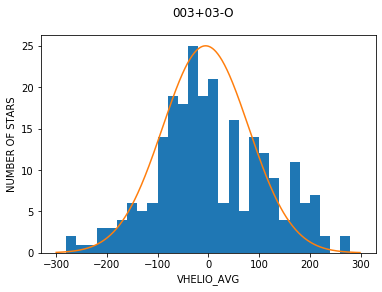

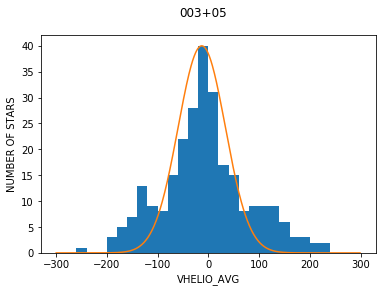

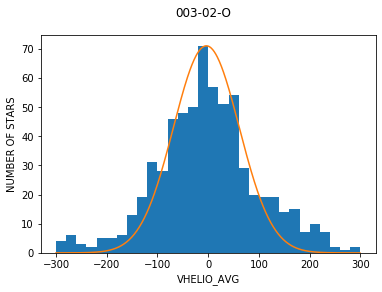

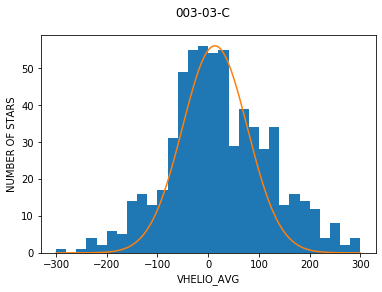

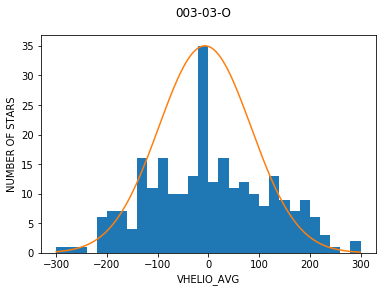

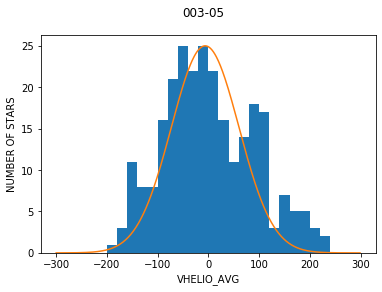

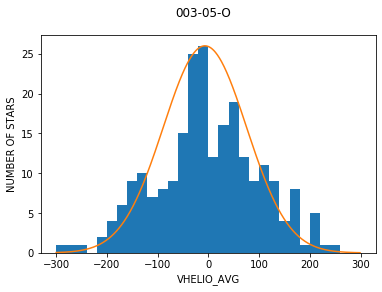

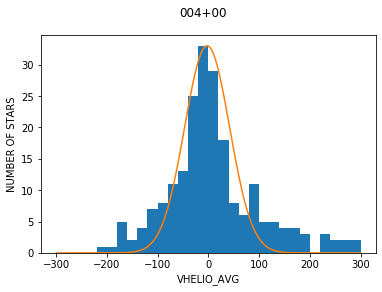

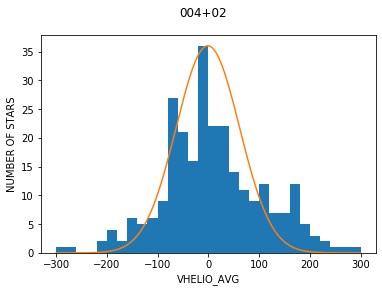

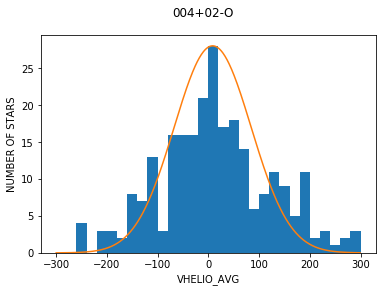

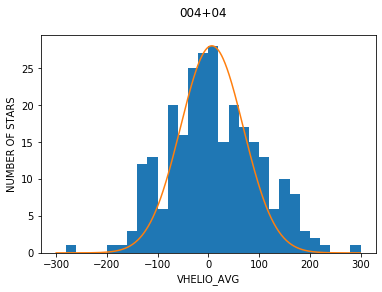

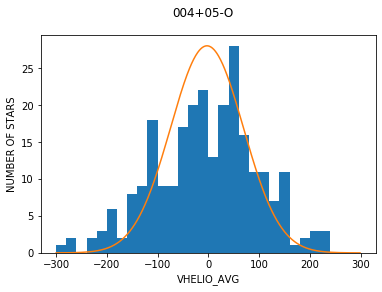

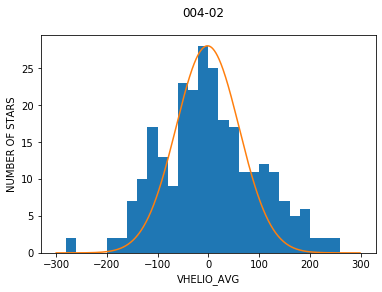

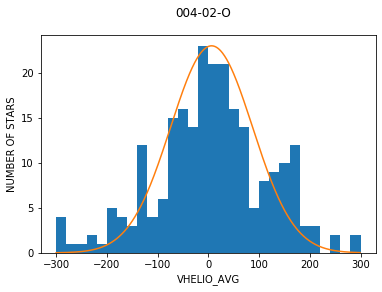

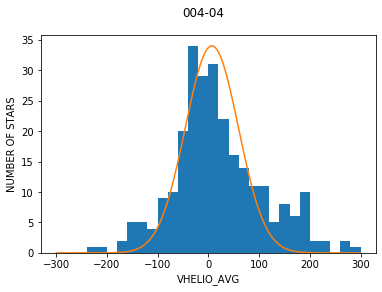

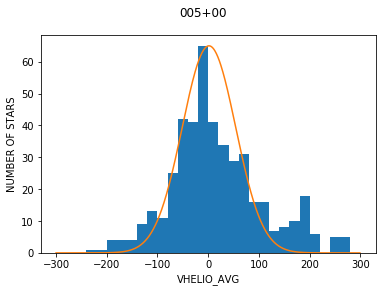

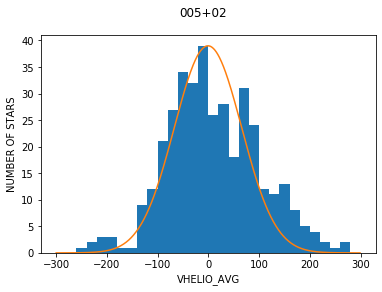

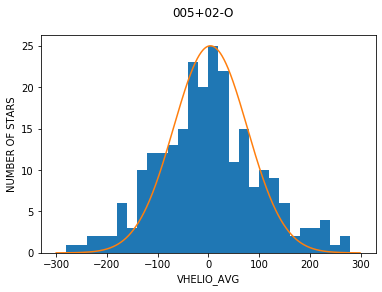

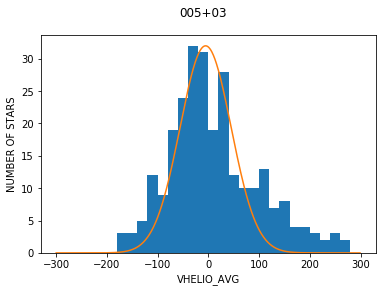

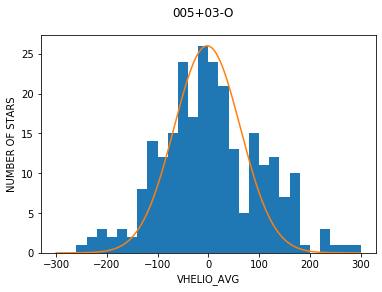

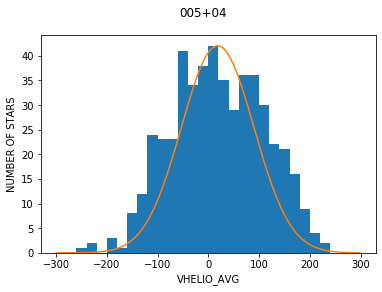

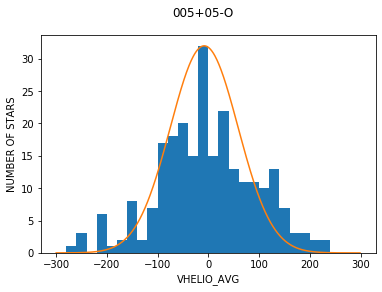

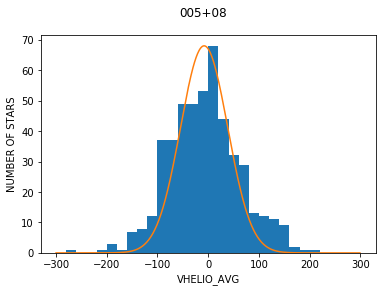

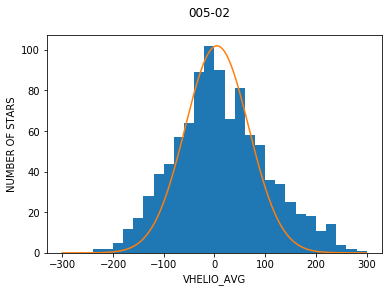

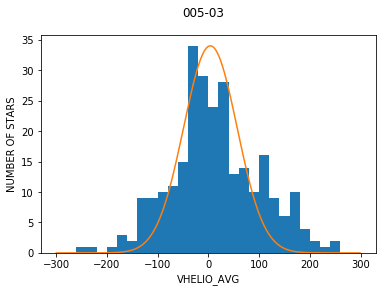

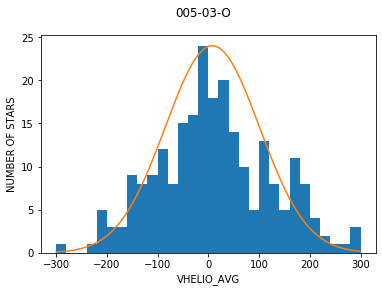

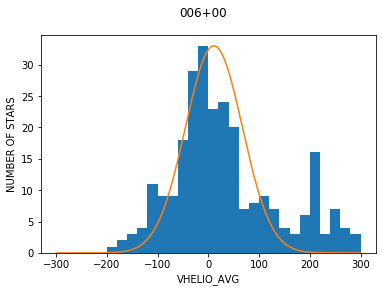

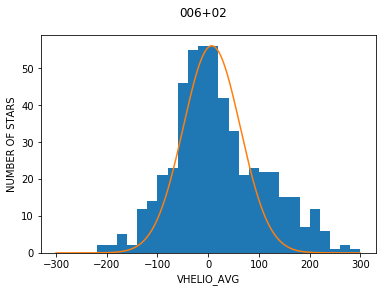

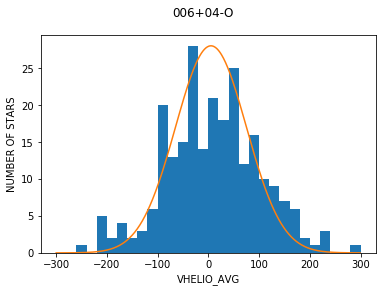

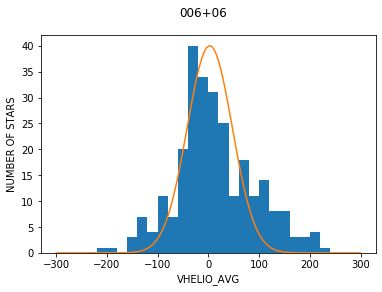

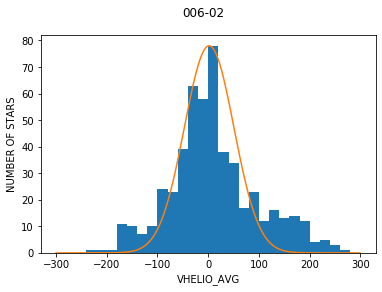

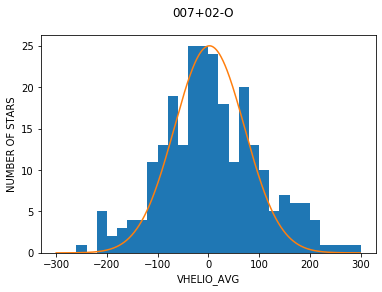

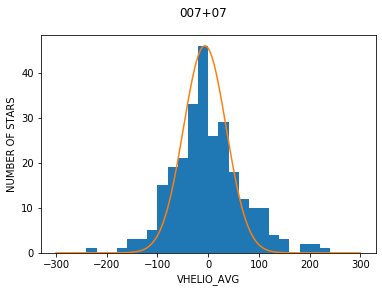

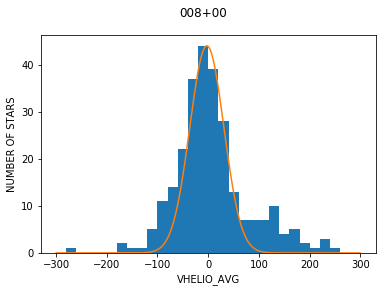

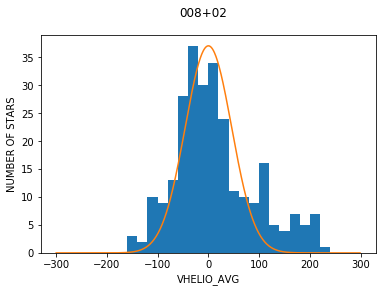

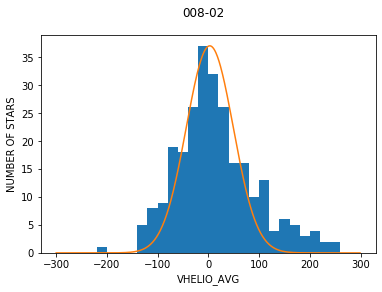

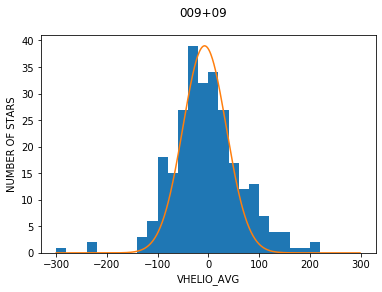

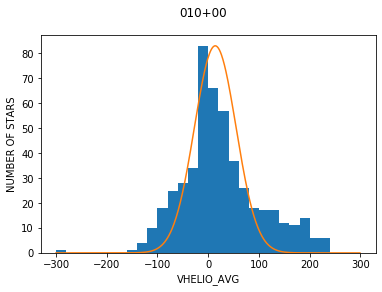

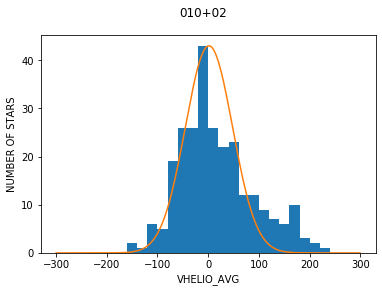

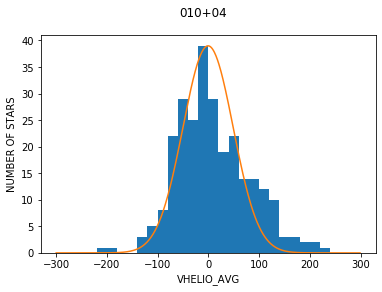

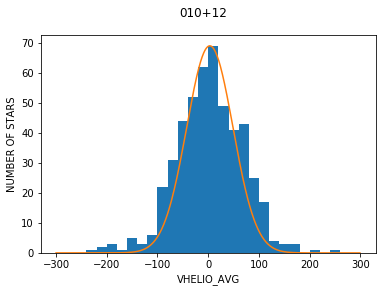

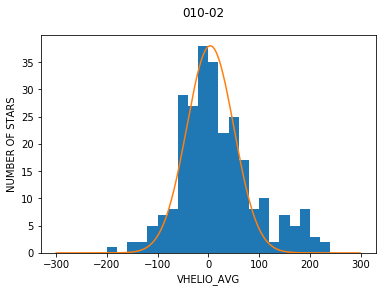

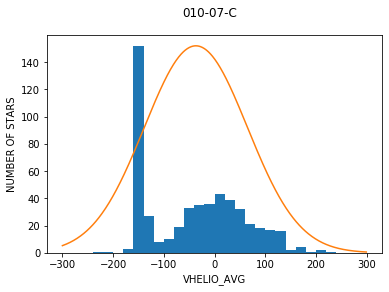

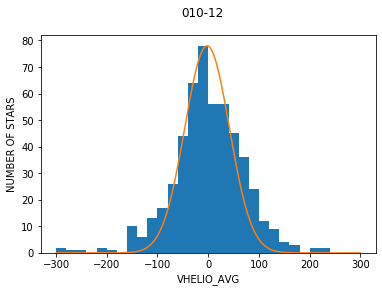

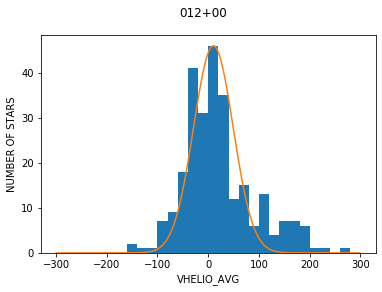

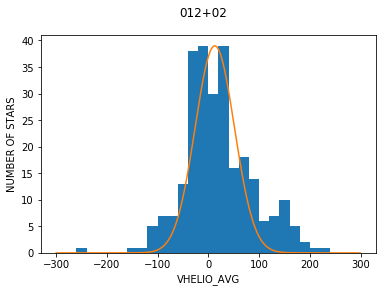

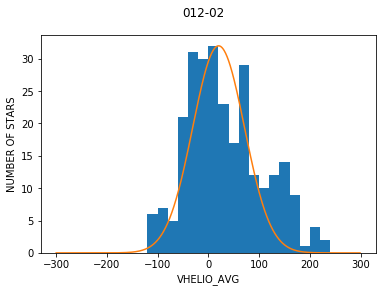

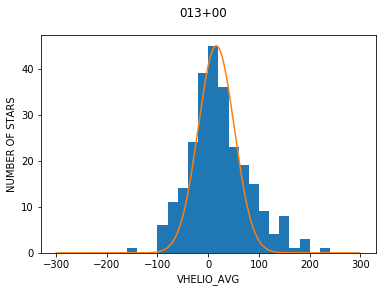

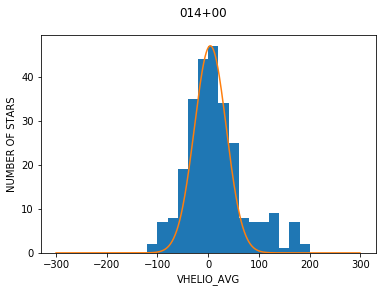

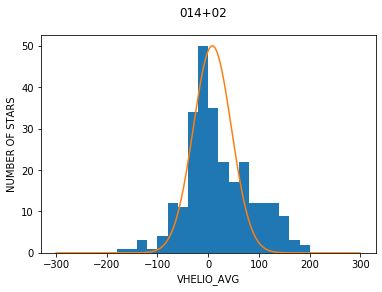

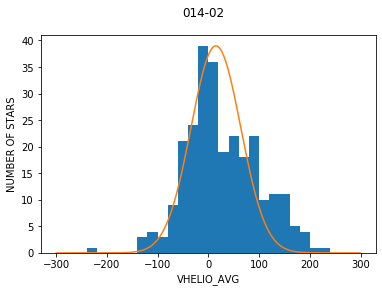

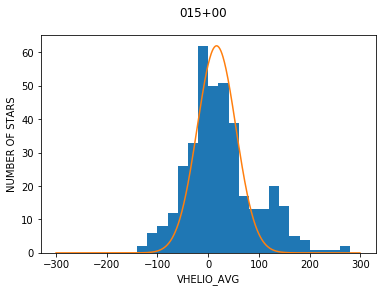

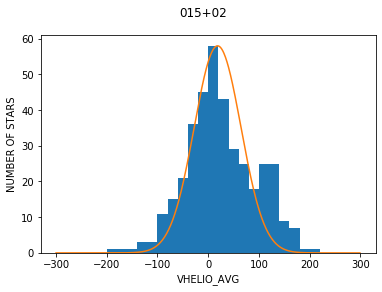

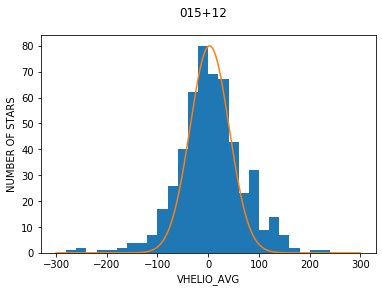

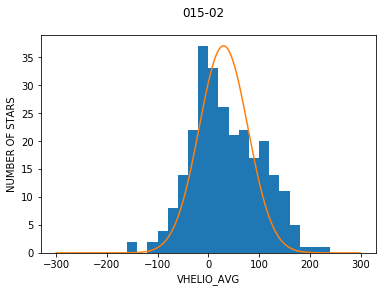

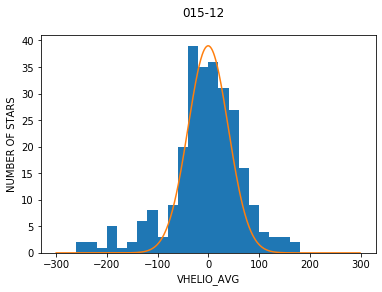

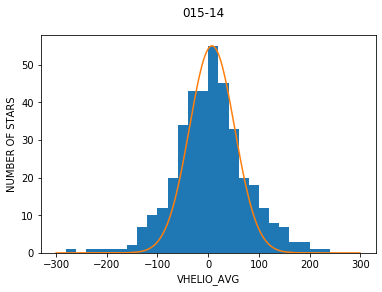

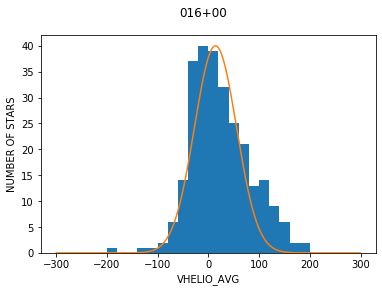

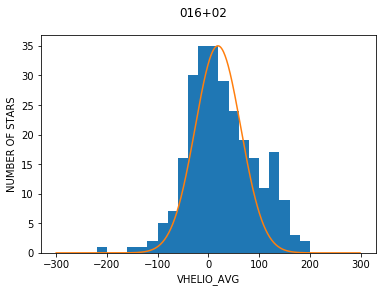

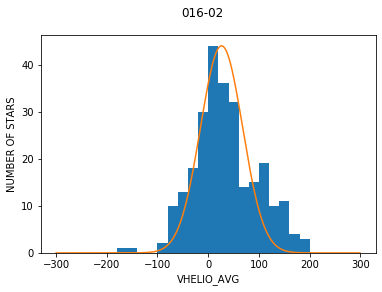

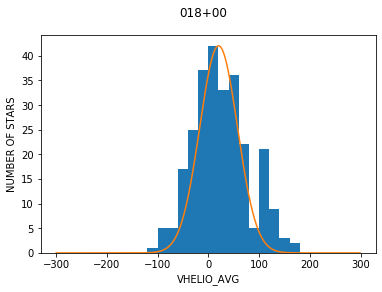

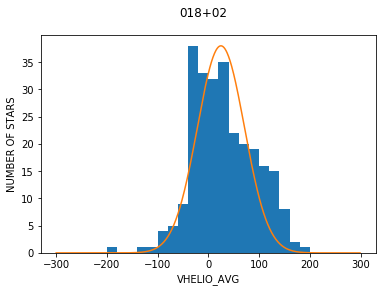

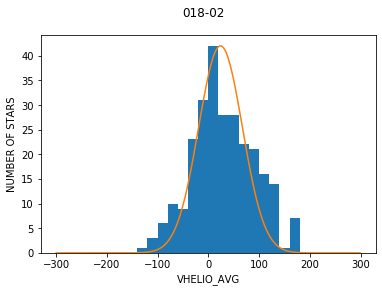

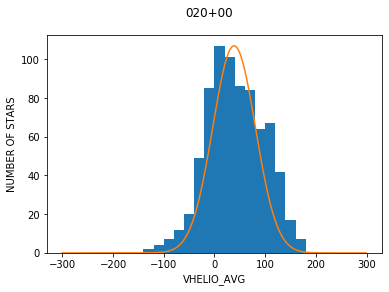

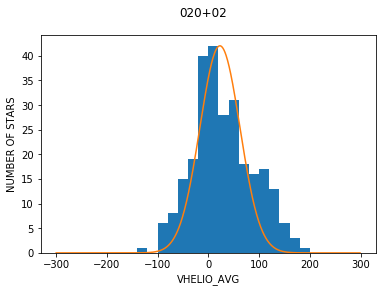

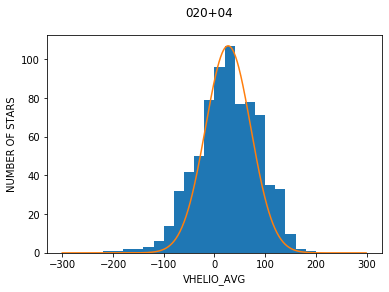

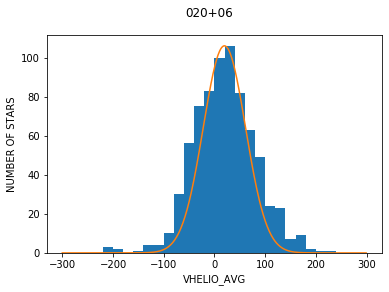

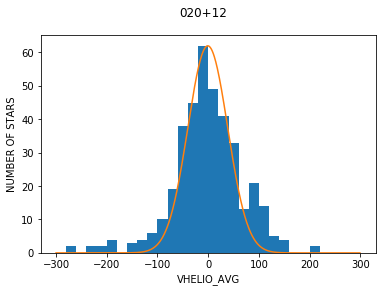

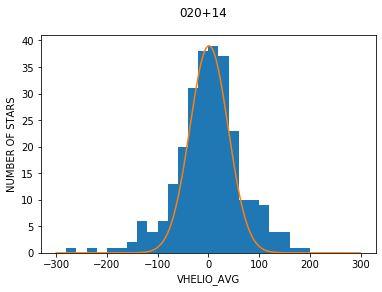

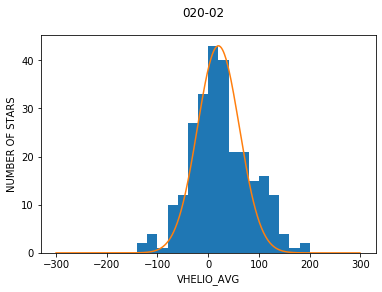

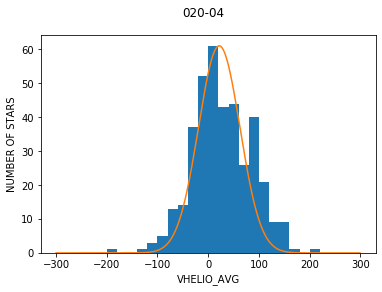

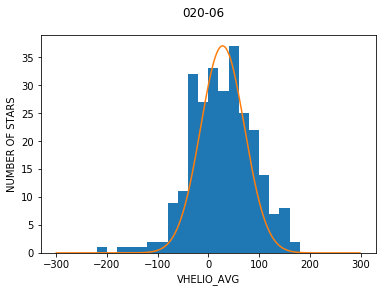

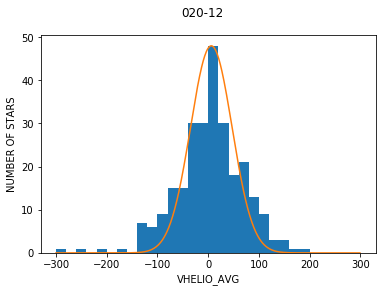

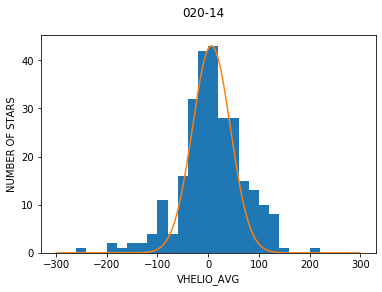

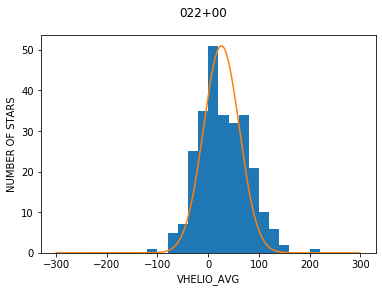

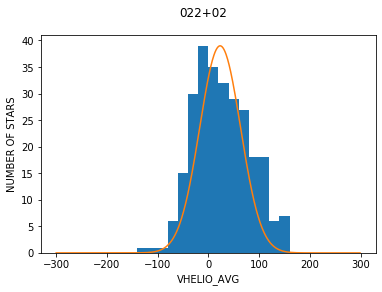

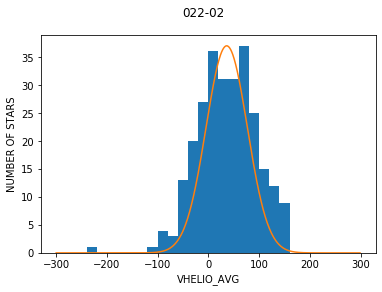

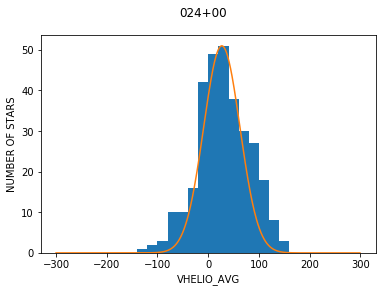

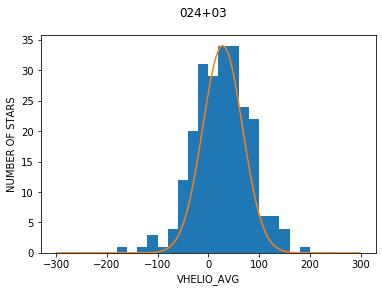

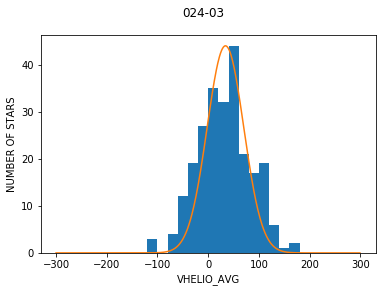

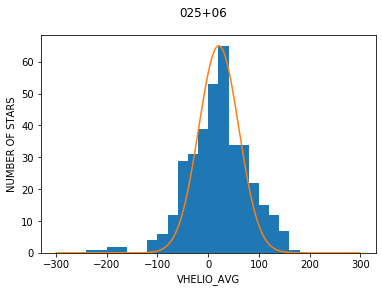

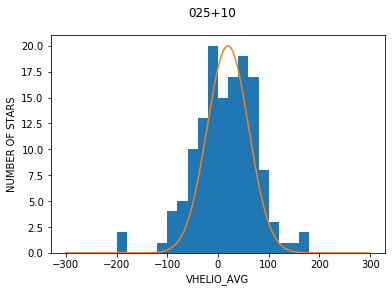

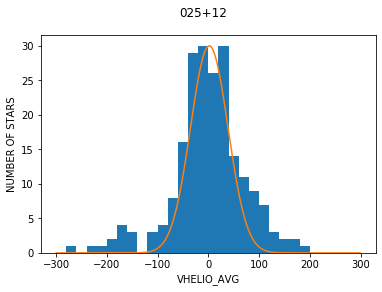

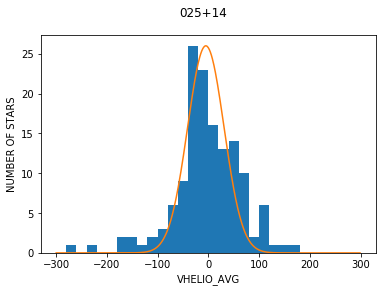

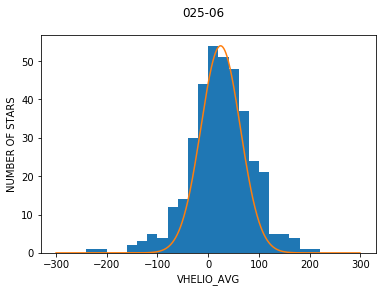

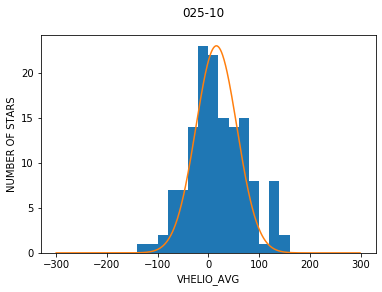

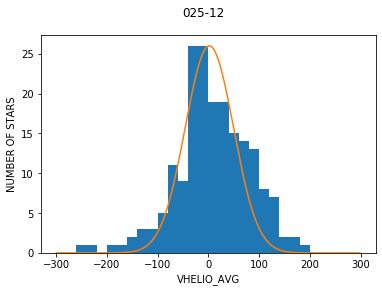

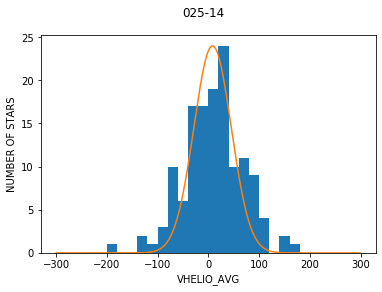

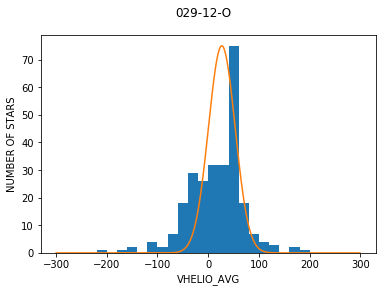

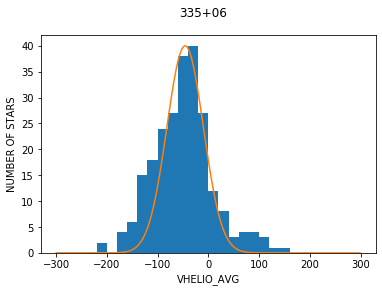

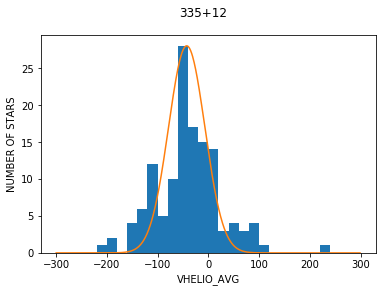

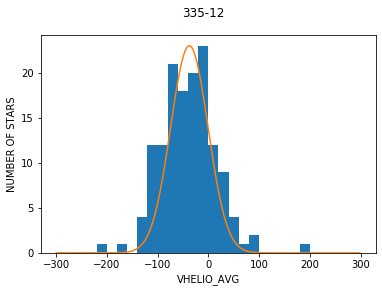

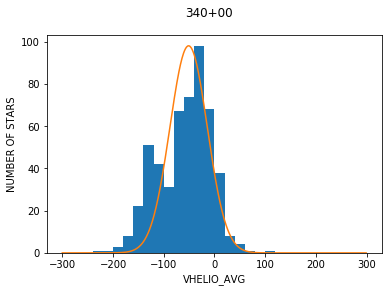

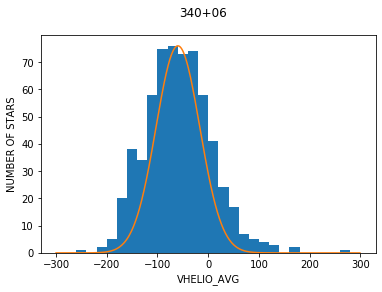

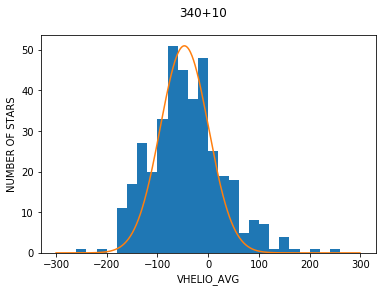

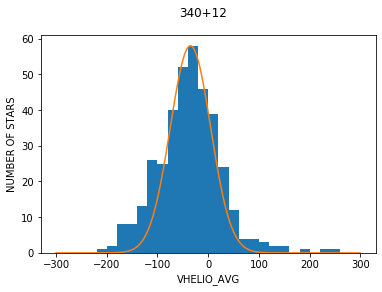

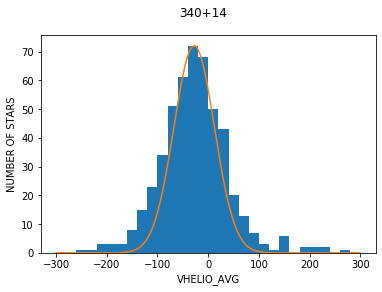

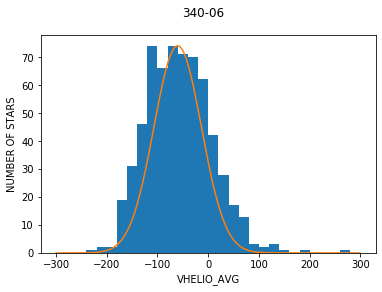

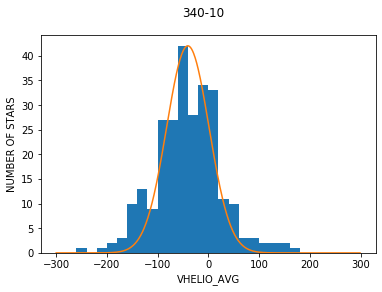

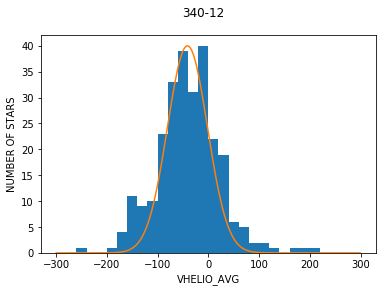

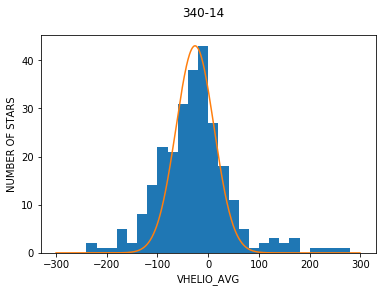

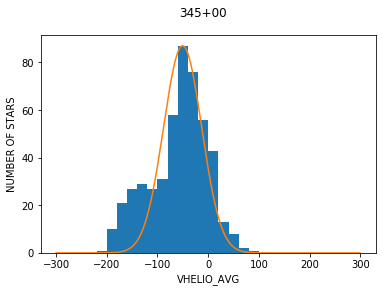

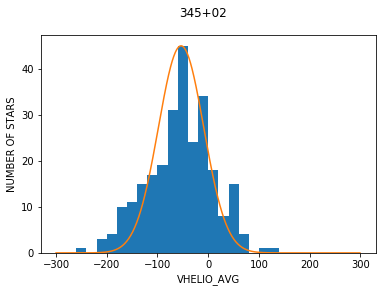

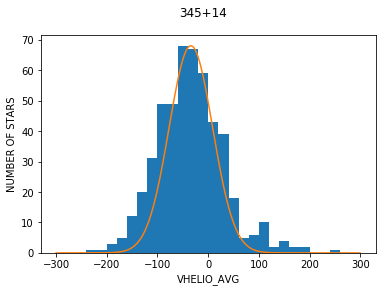

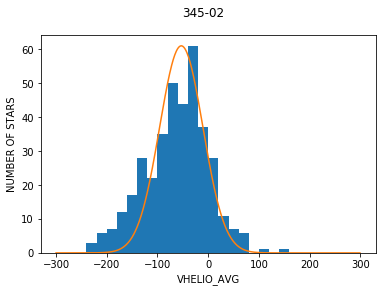

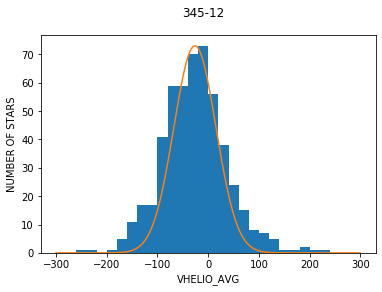

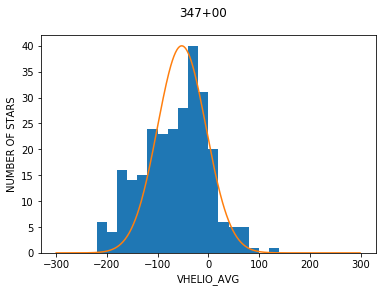

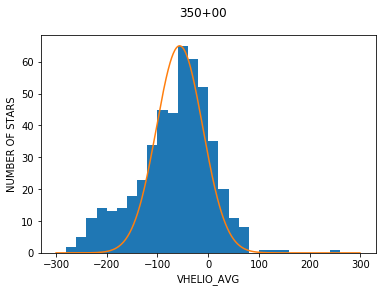

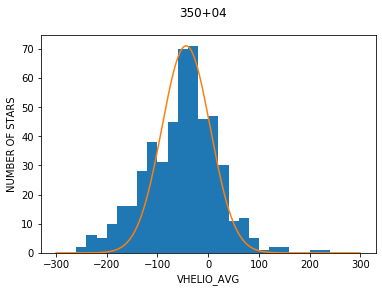

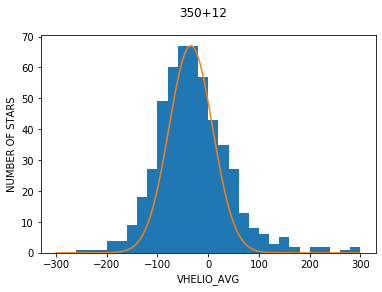

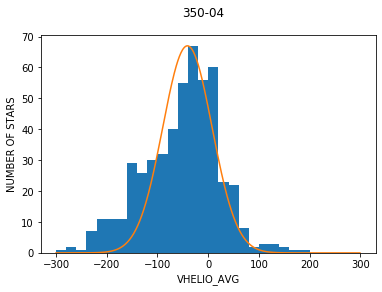

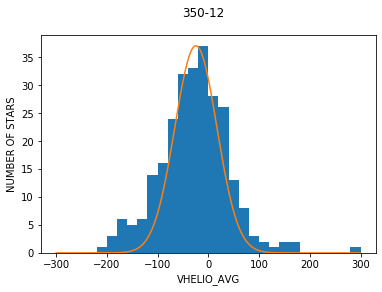

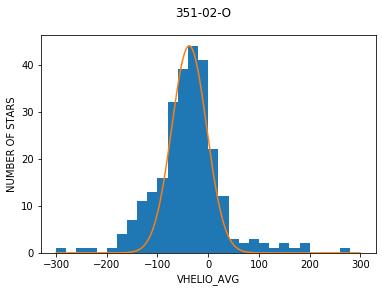

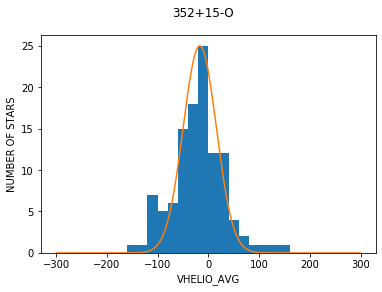

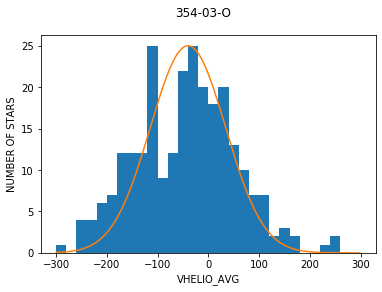

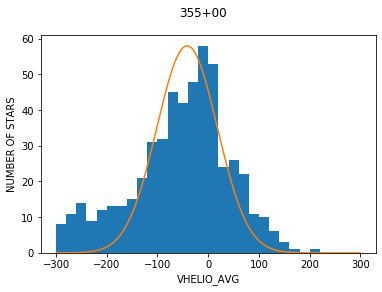

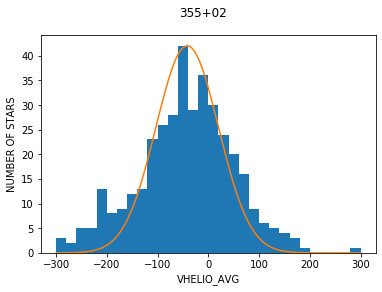

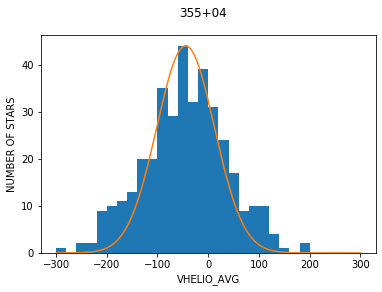

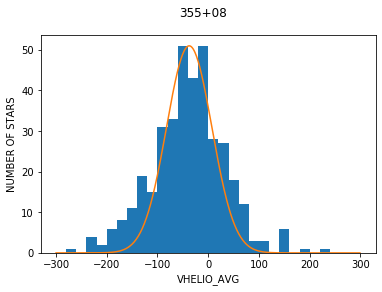

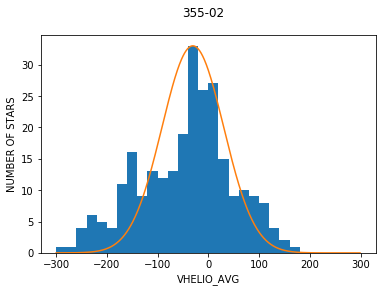

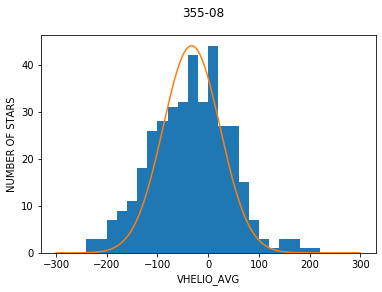

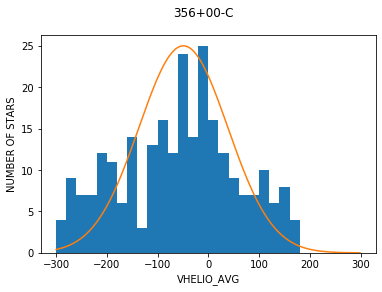

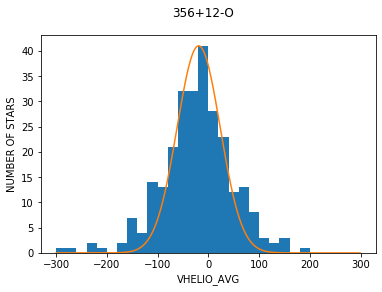

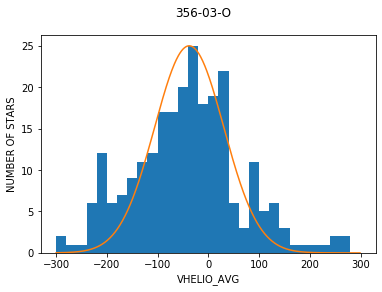

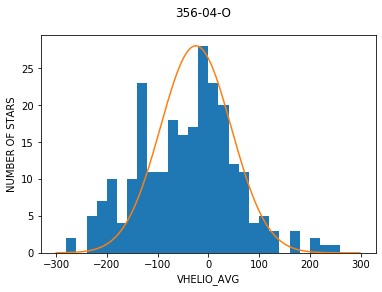

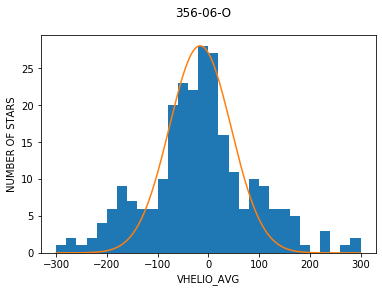

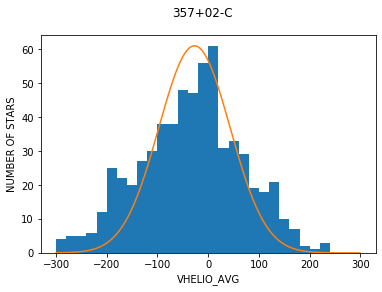

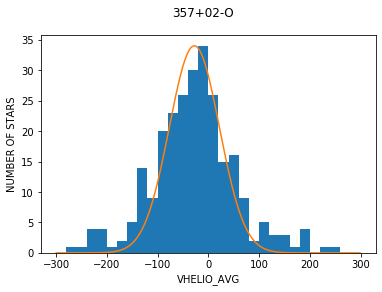

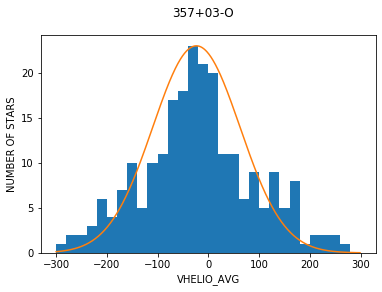

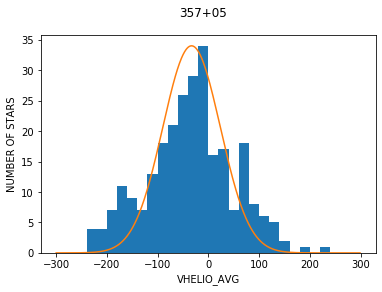

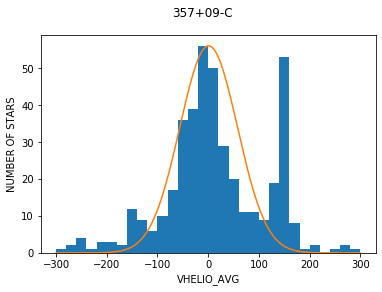

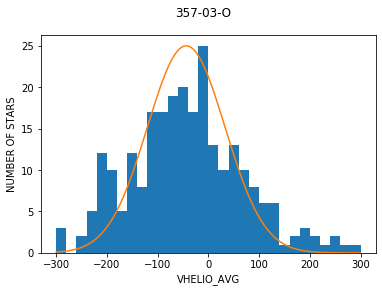

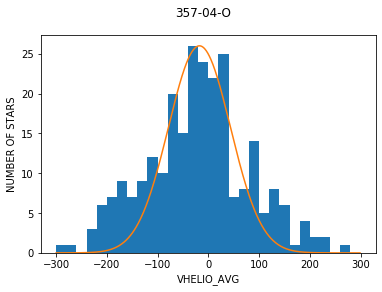

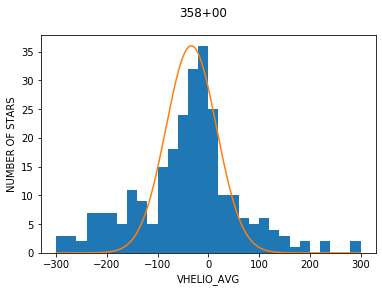

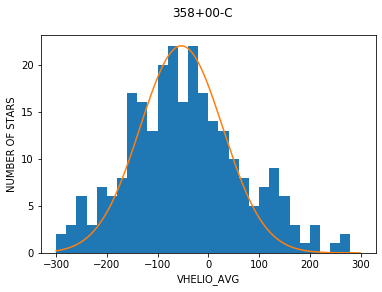

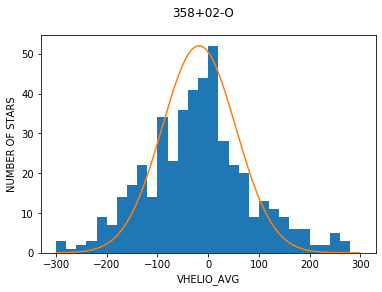

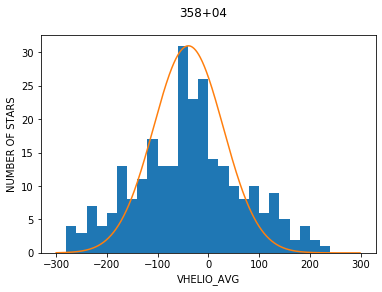

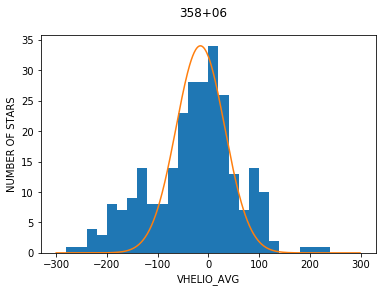

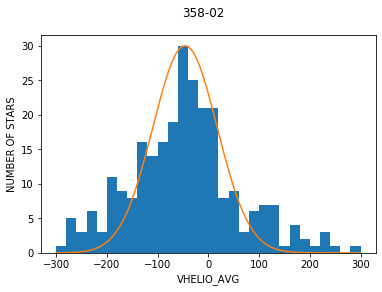

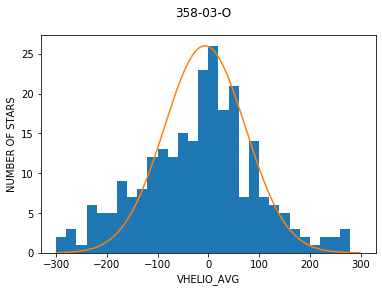

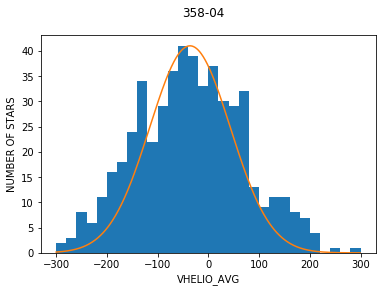

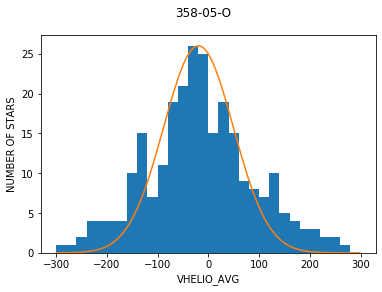

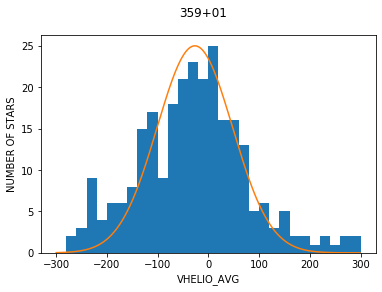

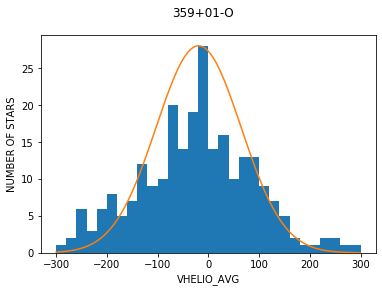

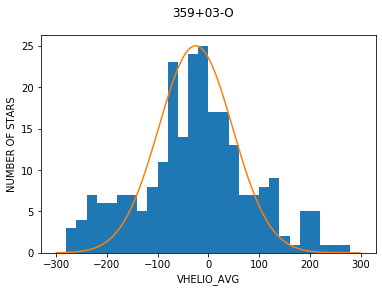

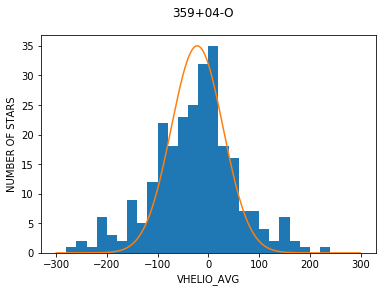

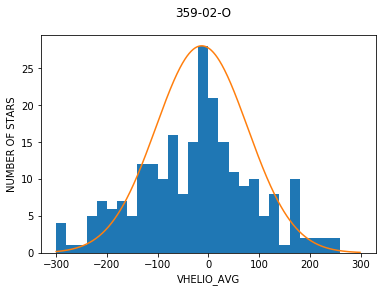

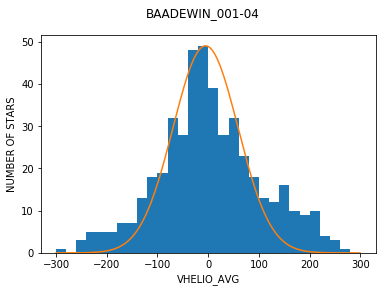

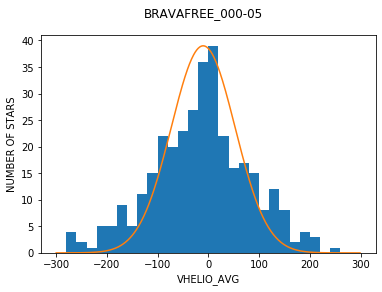

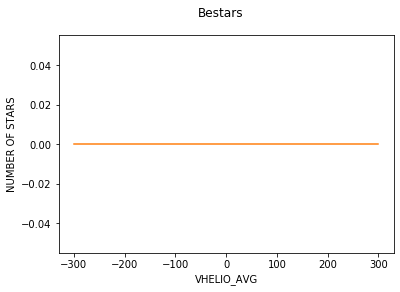

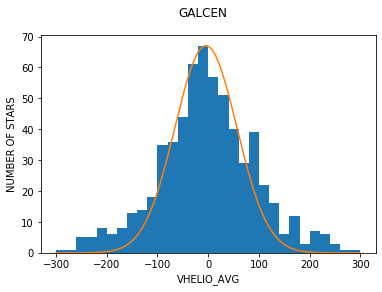

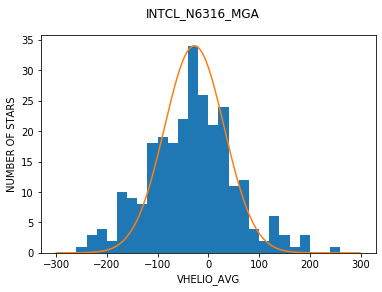

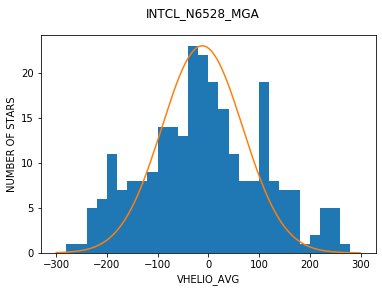

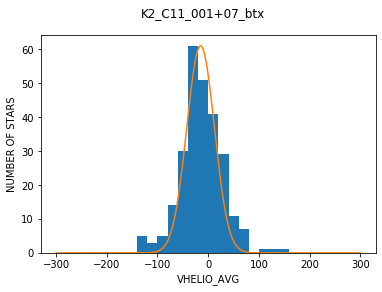

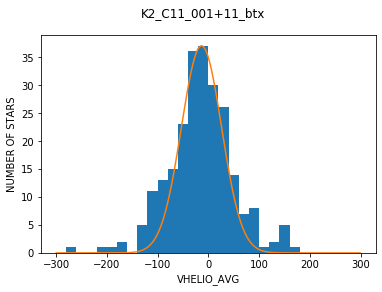

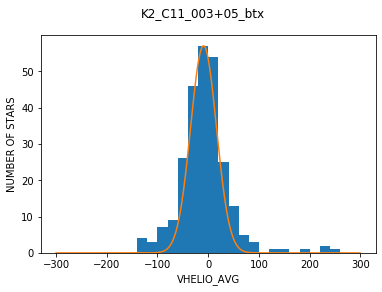

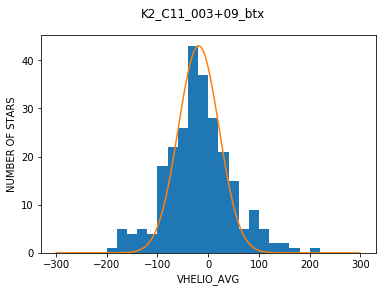

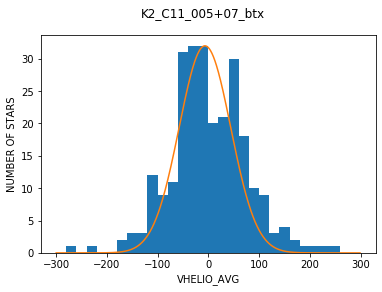

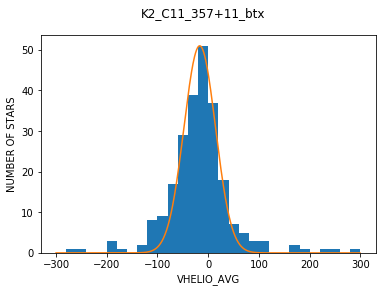

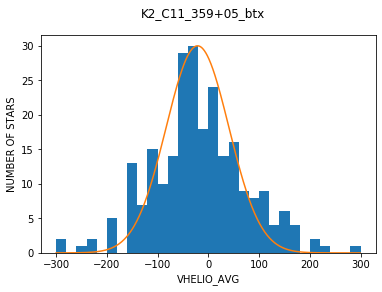

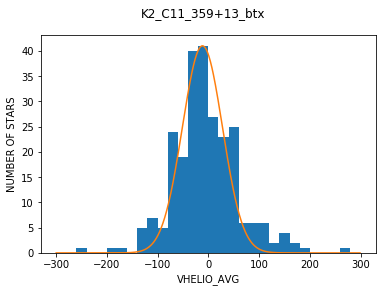

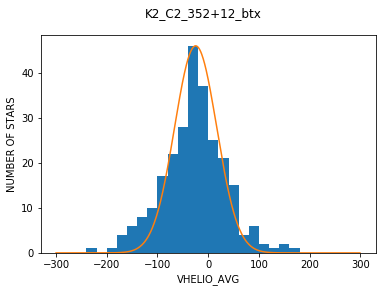

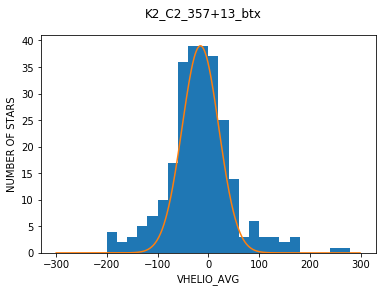

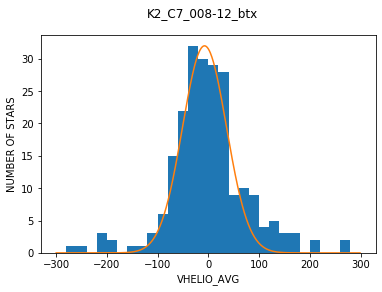

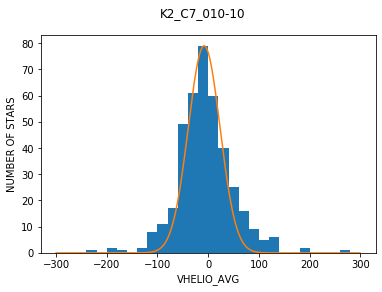

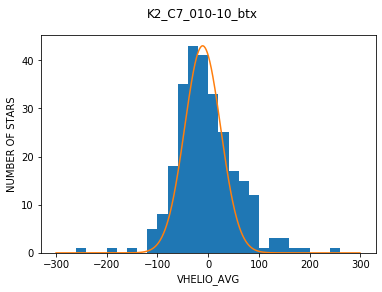

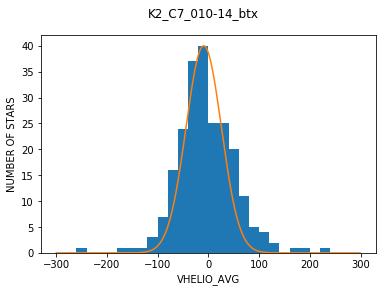

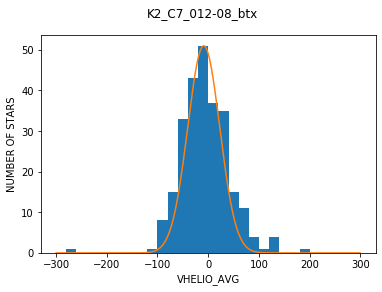

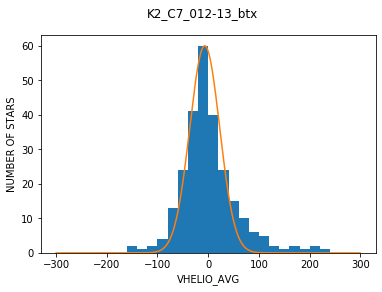

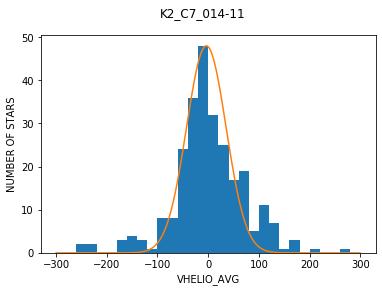

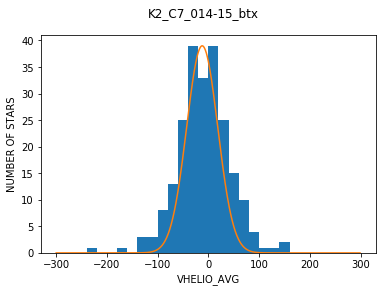

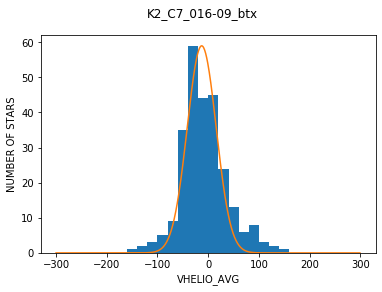

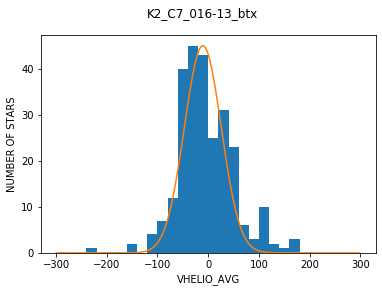

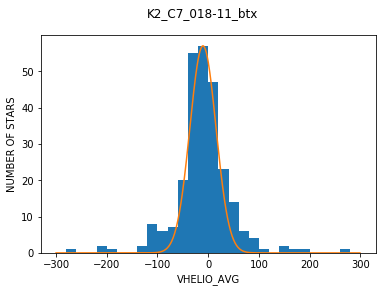

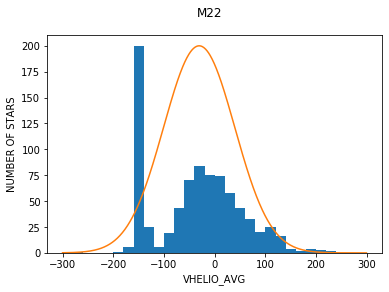

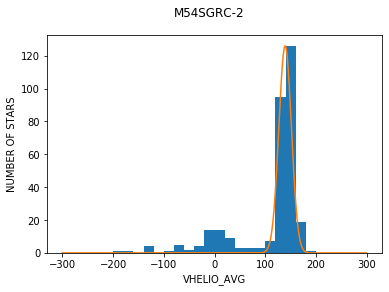

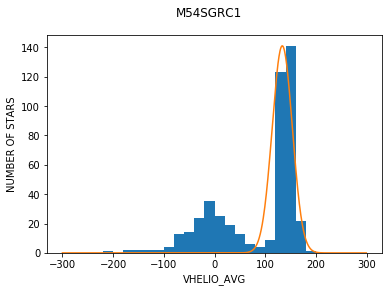

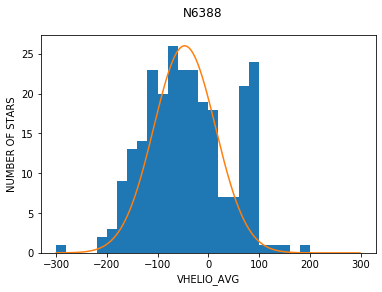

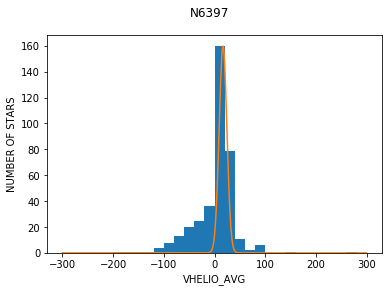

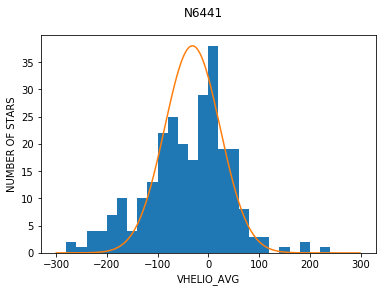

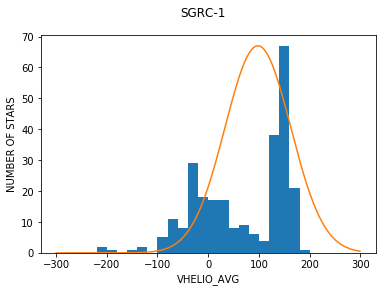

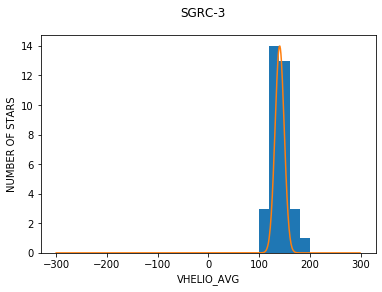

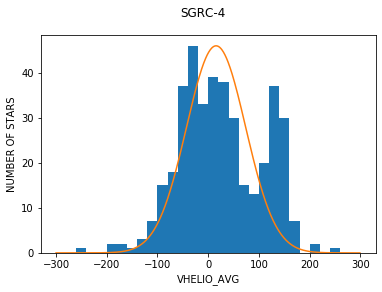

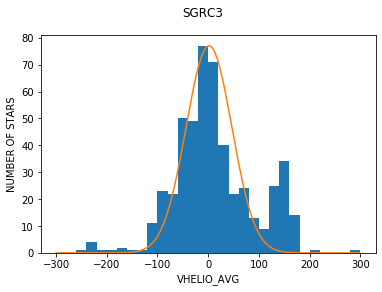

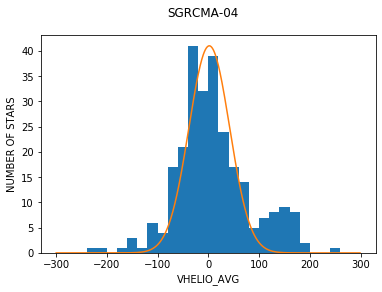

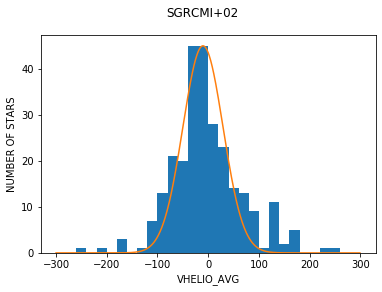

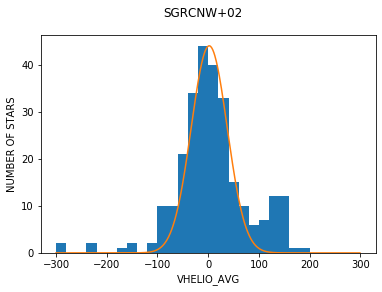

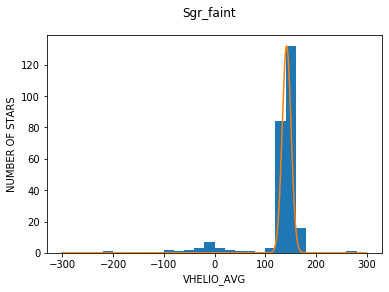

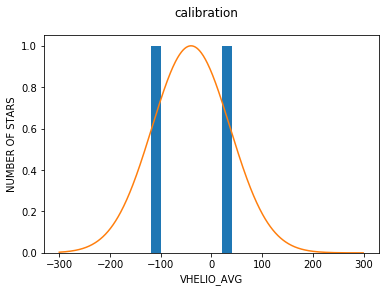

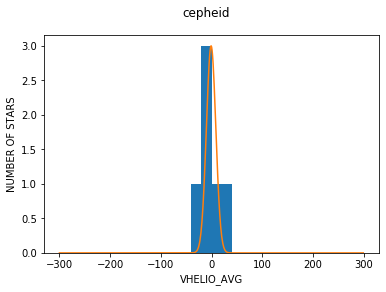

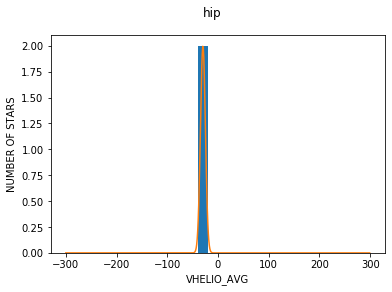

<Figure size 432x288 with 0 Axes>

In [28]:
xGauss = np.arange(-300, 300, 1)

for i in uniqueFields:
    ind, = np.where((cat["FIELD"]==str(i)) & (abs(cat['VHELIO_AVG'])<1000))
    newCat = cat[ind]
    vh = newCat["VHELIO_AVG"]
    (n, bins, patches) = plt.hist(vh, bins = 30, range=(-300,300))

    hist,edges = np.histogram(vh, range=(-300,300), bins=30)
    vTotal = np.sum(vh)
    starsTotal = np.sum(hist)

    vAvg = np.median(vh)
    #sigma = np.std(vh)
    sigma = mad(np.array(vh))
    amplitude = max(hist)
    
    xGuass = np.arange(-300, 300, 1)
    yGauss = gaussian(xGauss, amplitude, vAvg, sigma)

    plt.plot(xGuass, yGauss)
    
    plt.suptitle(i)
    plt.xlabel("VHELIO_AVG")
    plt.ylabel("NUMBER OF STARS")
    plt.figure(i)
    plt.show



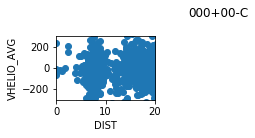

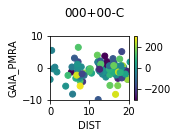

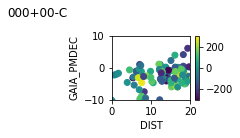

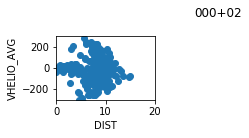

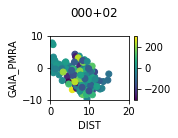

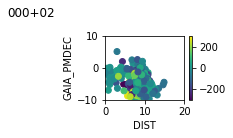

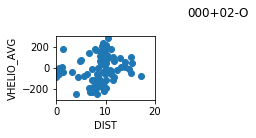

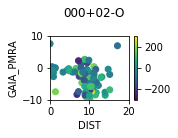

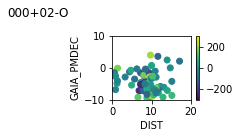

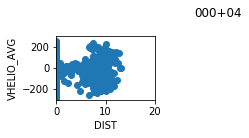

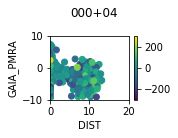

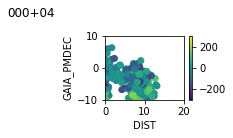

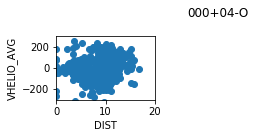

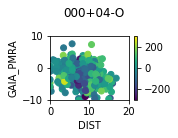

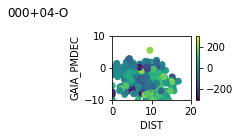

KeyboardInterrupt: 

In [39]:
y_axis = ["VHELIO_AVG", "GAIA_PMRA", "GAIA_PMDEC"]
#make 3 plots for all of them (3 columns)
#use n-body simulation to compare to this data
#graph gaia pmra vs gaia pmdec color code by distance and by velocity

for i in uniqueFields:
    ind, = np.where((cat["FIELD"]==i) & (abs(cat['VHELIO_AVG'])<1000) & (cat['SNR']>20) & (cat['LOGG']<3.8))
    field = cat[ind]
    dist = field["DIST"]
    plt.figure(figsize = (8,8))
    for k,axis in enumerate(y_axis, start=1):
        plt.subplot(1, 3, k)
        plt.xlabel("DIST")
        plt.ylabel(axis)
        y = field[axis]
        plt.xlim(0,20)
        plt.suptitle(i)
        if axis != "VHELIO_AVG":
            color = field["VHELIO_AVG"]
            plt.ylim(-10,10)
            plt.scatter(dist, y, c = color, vmin = -300, vmax = 300)
            plt.colorbar()
            plt.show()
        else:
            plt.ylim(-300,300)
            plt.scatter(dist, y)
            plt.show()

C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002A438B62378> (for post_execute):


KeyboardInterrupt: 

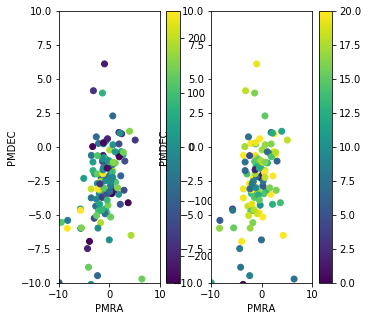

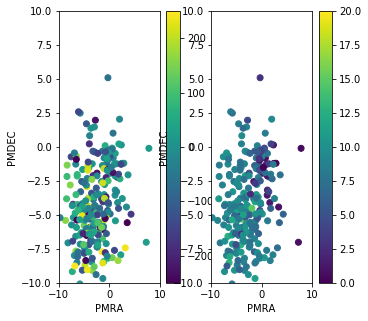

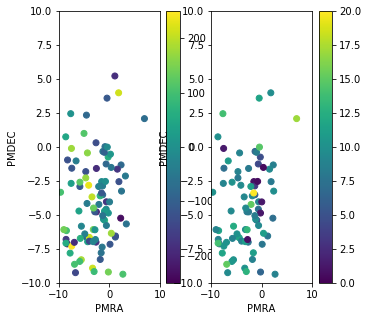

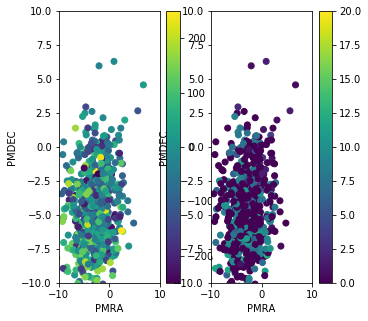

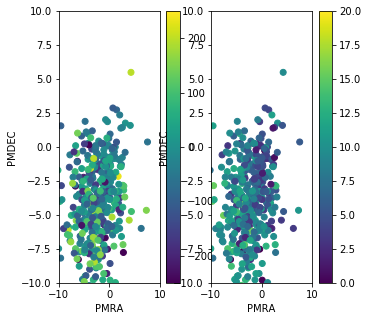

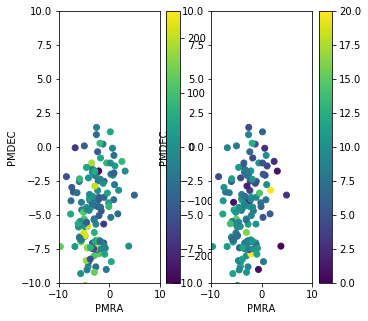

Error in callback <function flush_figures at 0x000002A438C351E0> (for post_execute):


KeyboardInterrupt: 

In [40]:
values = ["VHELIO_AVG", "DIST"]

for i in uniqueFields:
    ind, = np.where((cat["FIELD"]==i) & (abs(cat['VHELIO_AVG'])<1000) & (cat['SNR']>20) & (cat['LOGG']<3.8))
    field = cat[ind]
    pmra = field["GAIA_PMRA"]
    pmdec = field["GAIA_PMDEC"]
    
    plt.figure(figsize = (8,8))
    for z,j in enumerate(values, start = 1):
        plt.subplot(1, 2, z)
        plt.xlabel("PMRA")
        plt.ylabel("PMDEC")
        plt.xlim(-10,10)
        plt.ylim(-10,10)
        colorBar = field[j]
        if j == "VHELIO_AVG":
            plt.scatter(pmra, pmdec, c = colorBar, vmin = -250, vmax = 250)
            plt.colorbar()
            plt.show
        else:
            plt.scatter(pmra, pmdec, c = colorBar, vmin = 0, vmax = 20)
            plt.colorbar()
            plt.show
        
    

C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


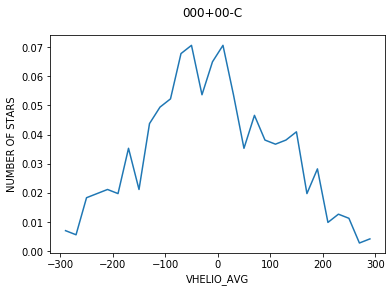

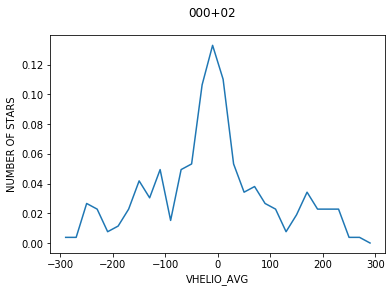

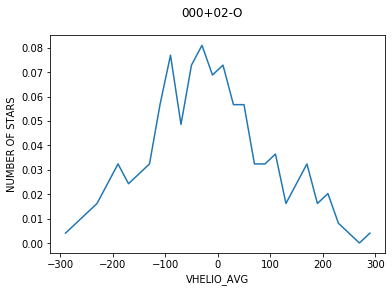

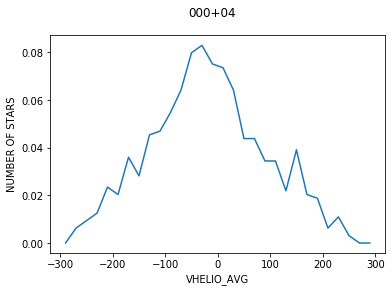

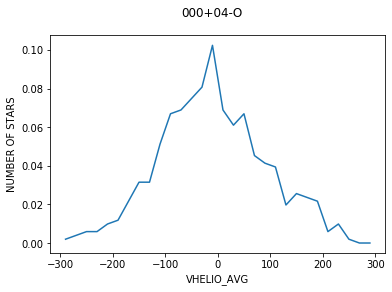

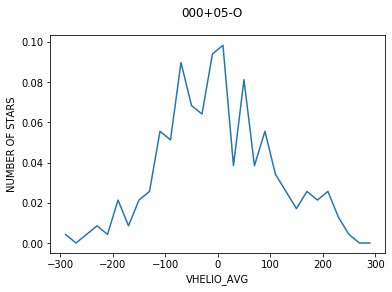

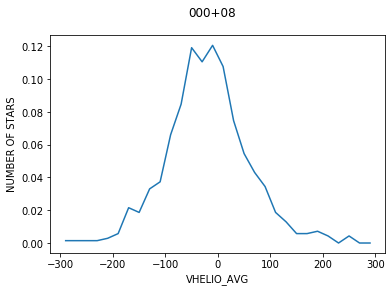

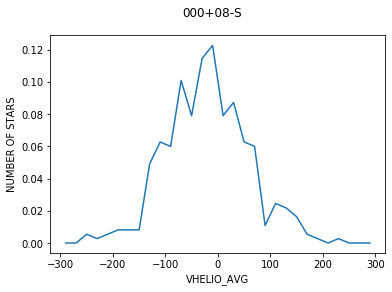

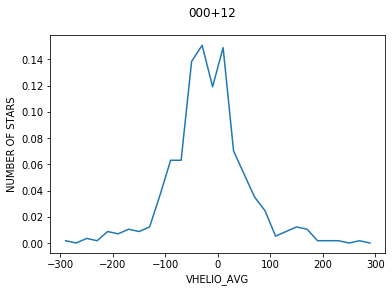

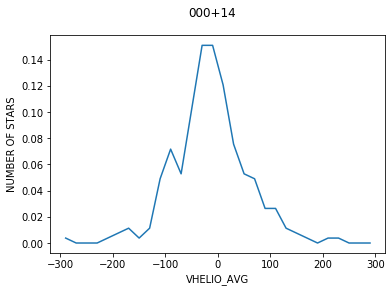

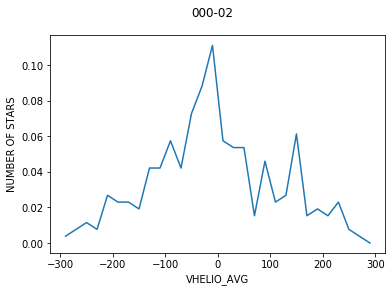

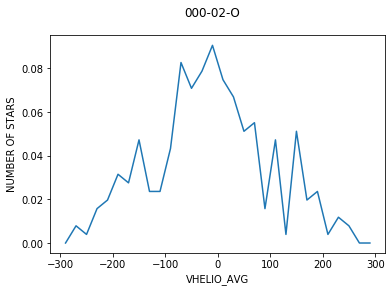

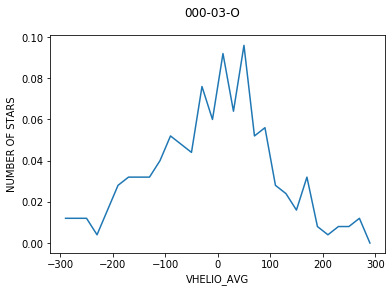

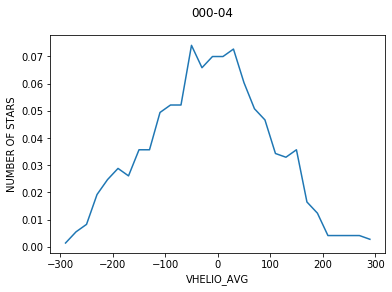

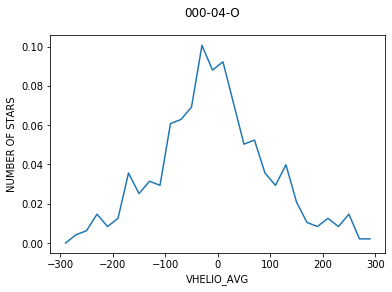

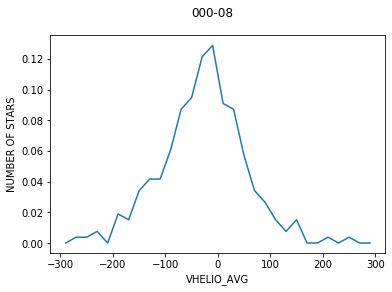

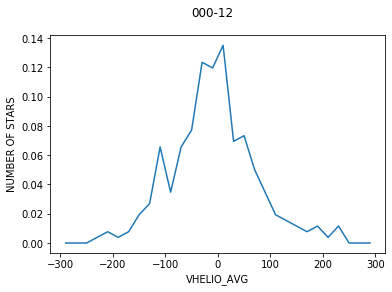

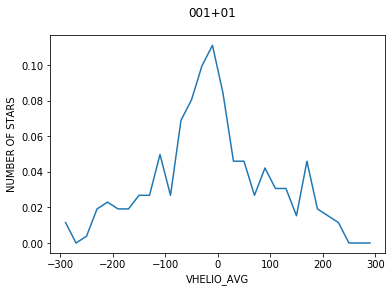

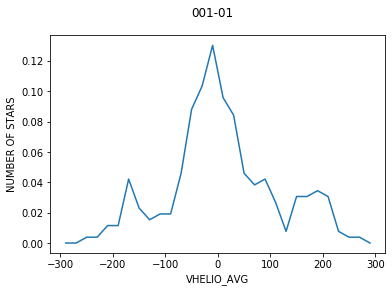

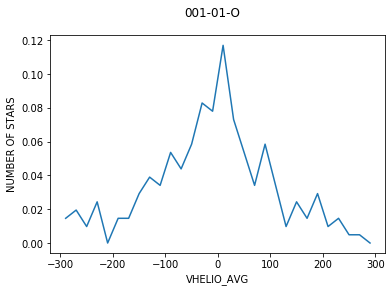

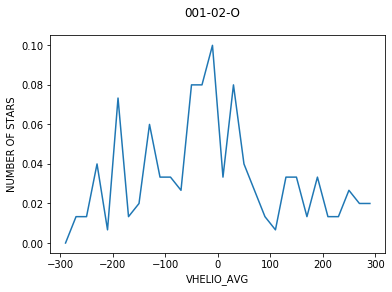

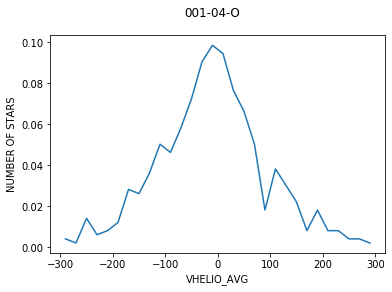

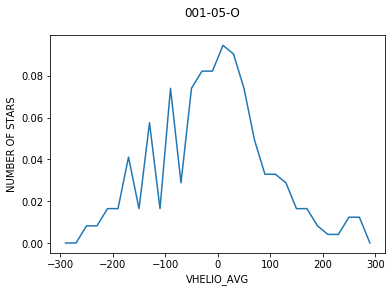

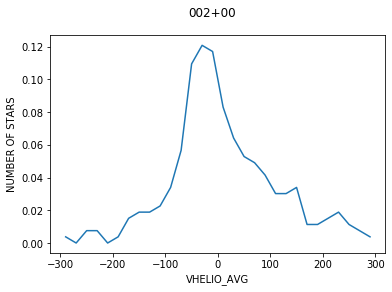

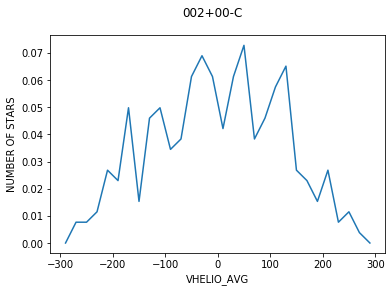

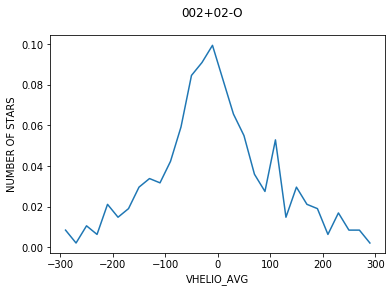

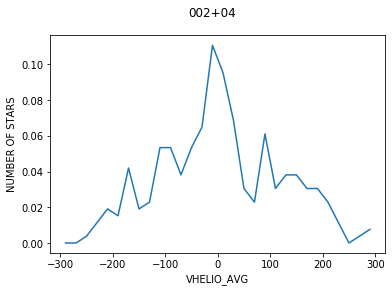

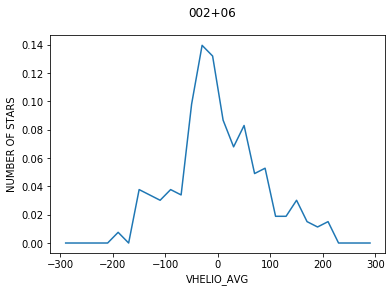

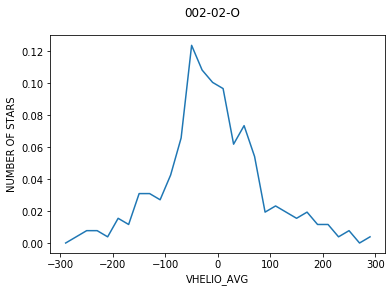

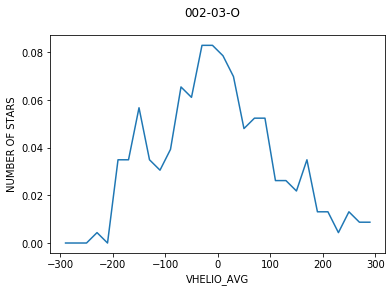

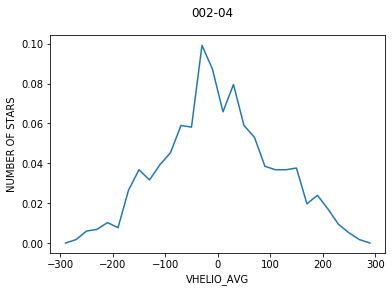

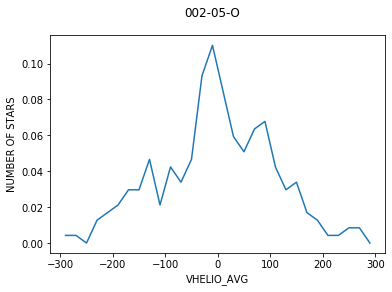

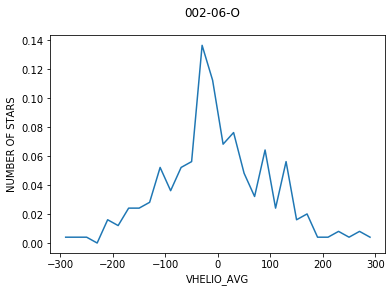

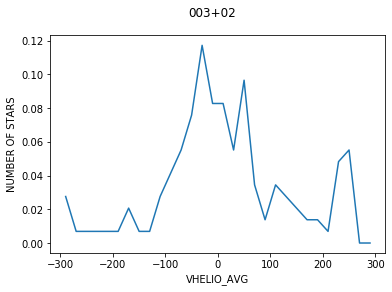

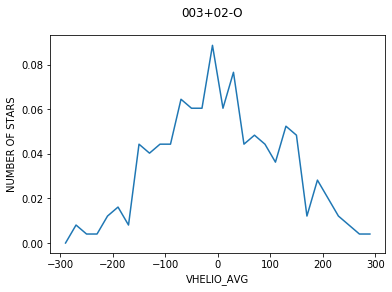

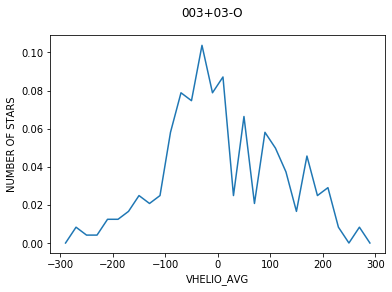

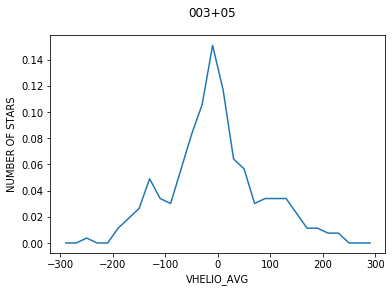

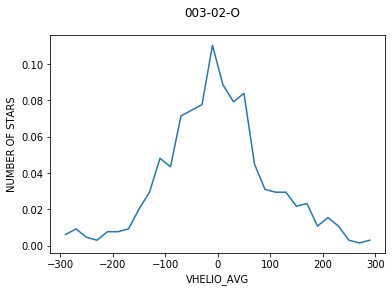

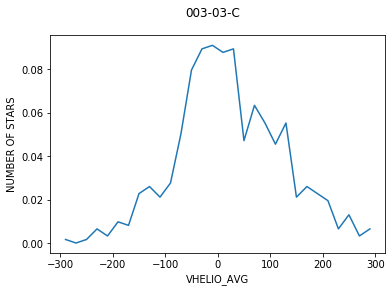

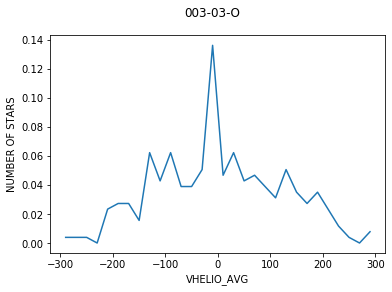

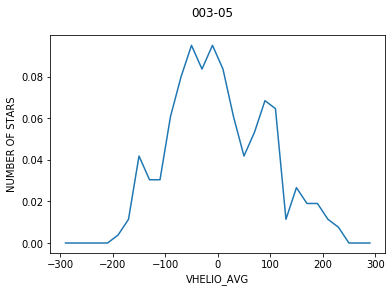

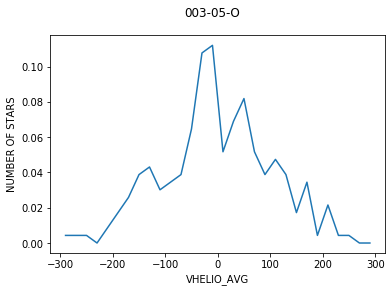

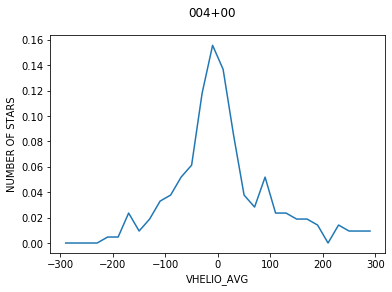

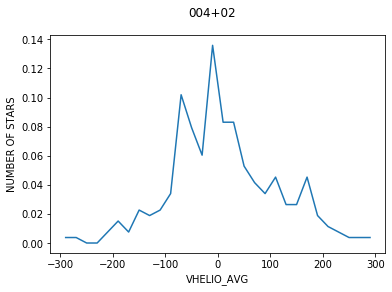

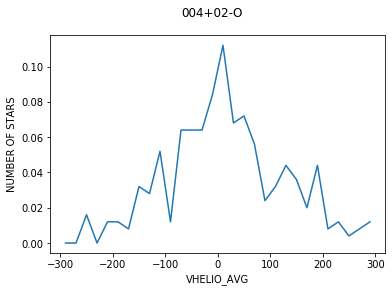

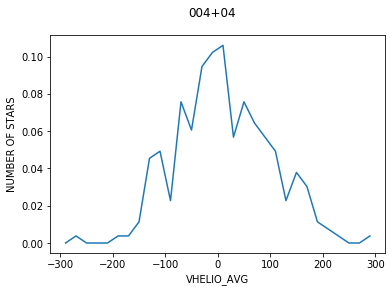

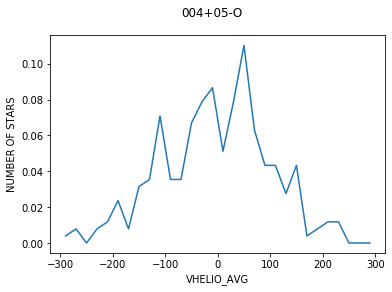

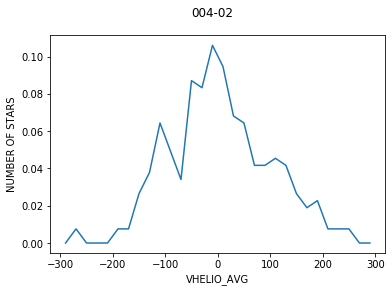

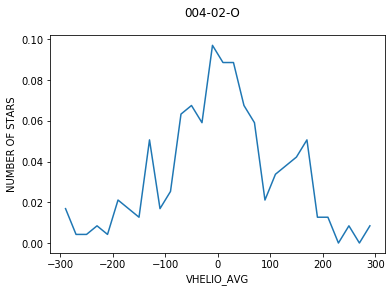

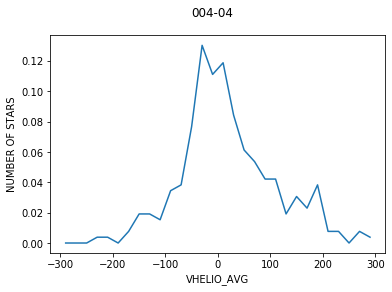

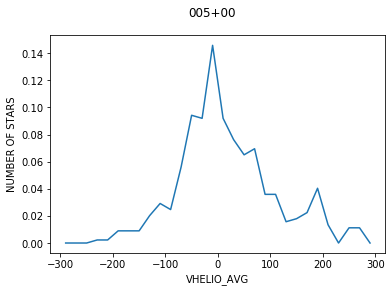

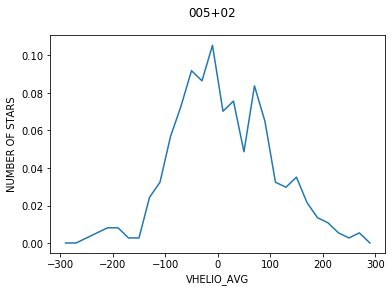

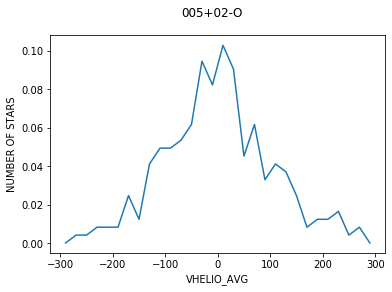

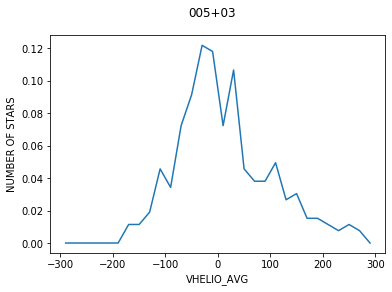

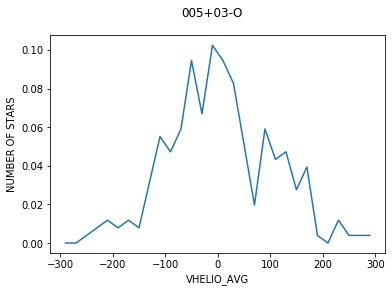

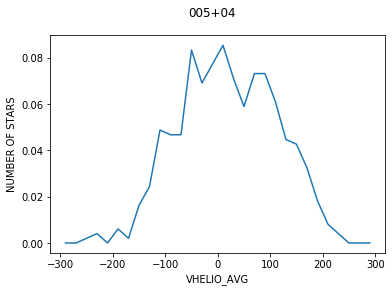

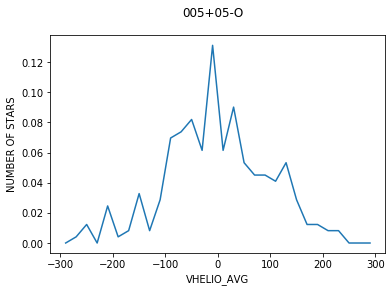

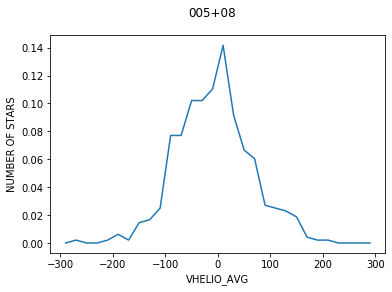

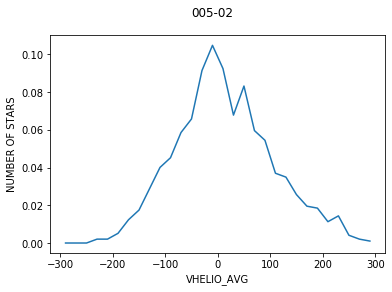

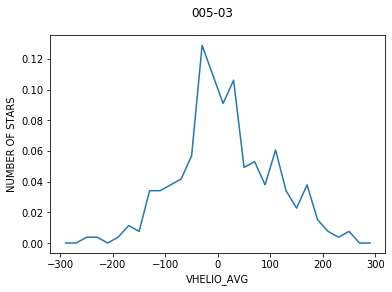

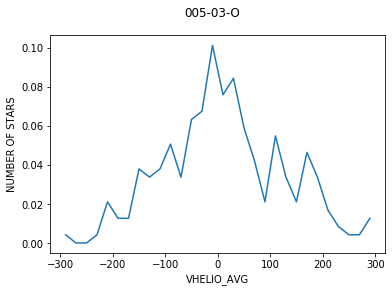

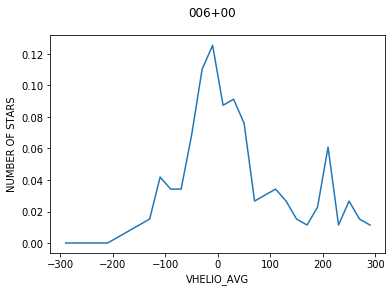

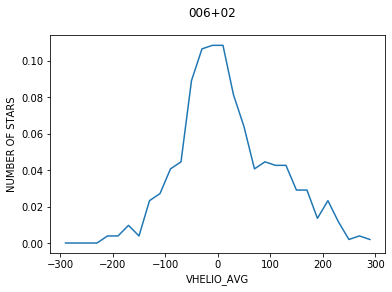

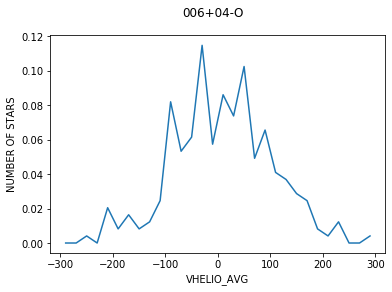

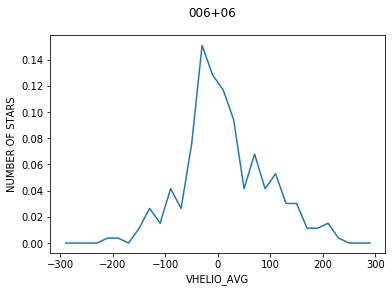

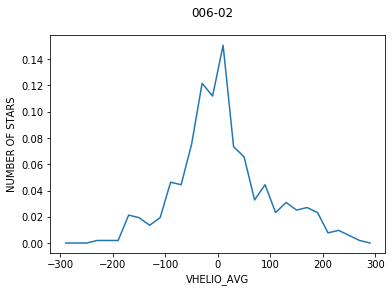

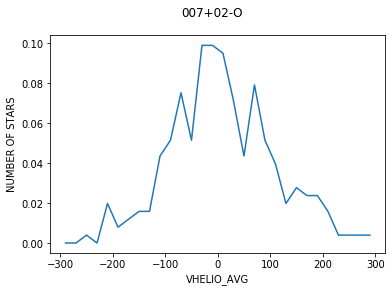

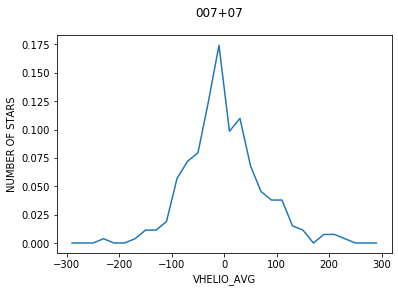

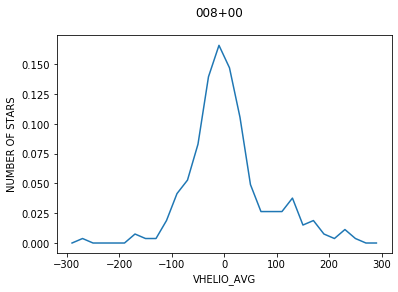

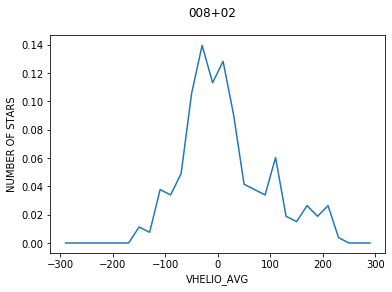

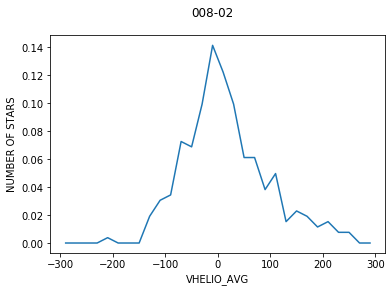

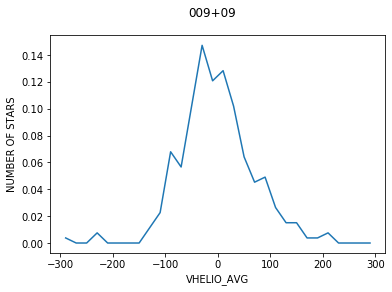

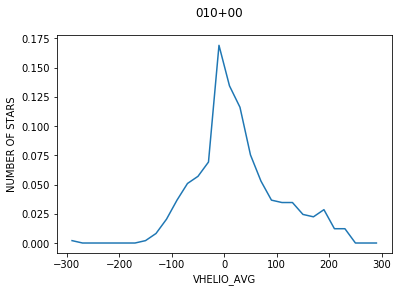

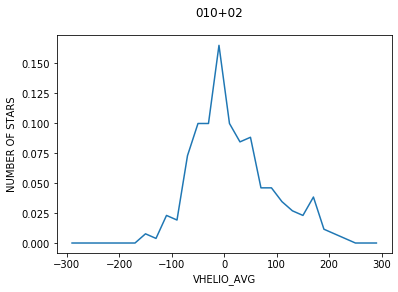

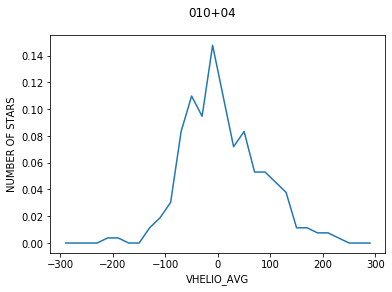

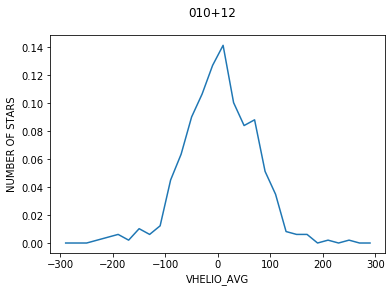

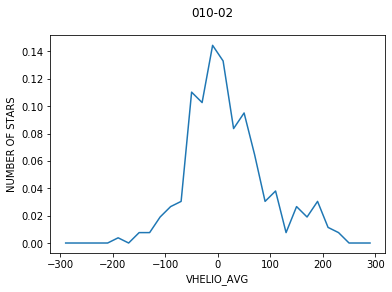

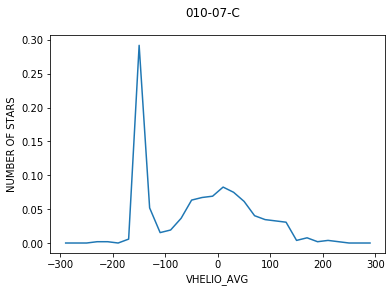

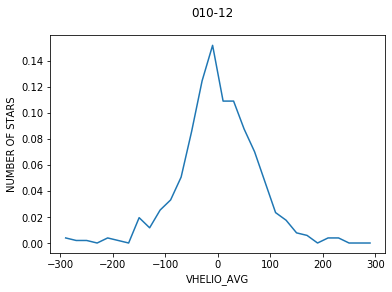

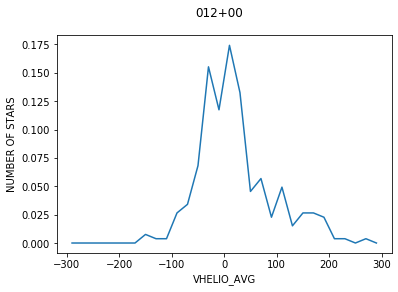

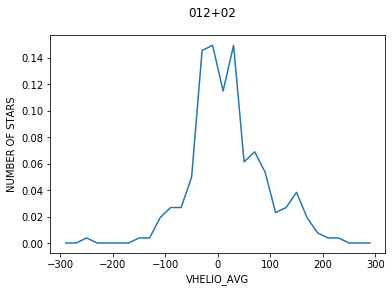

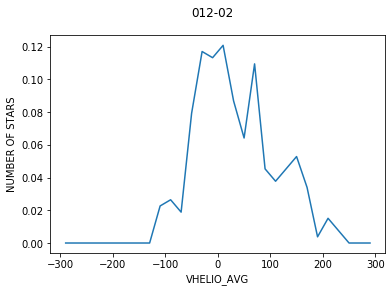

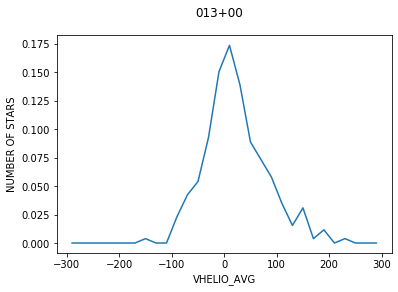

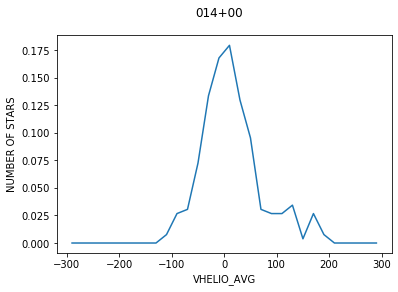

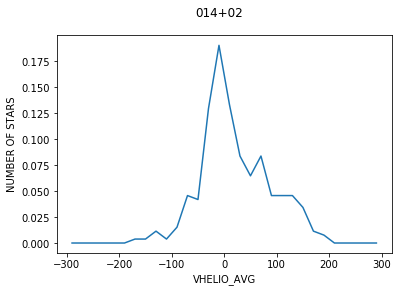

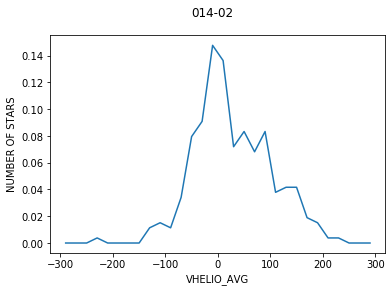

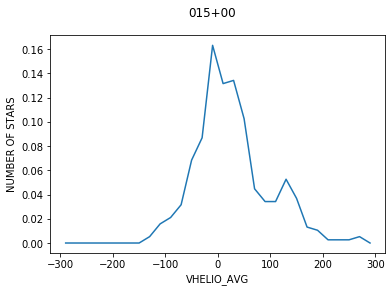

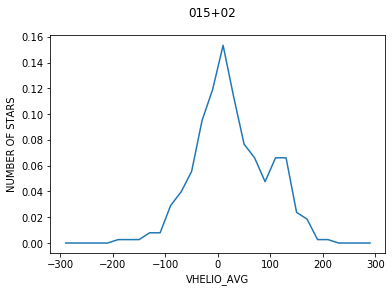

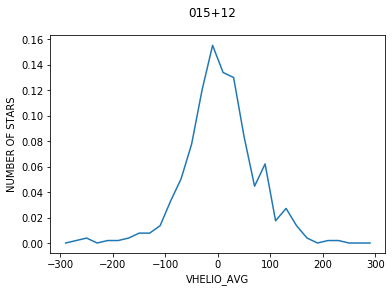

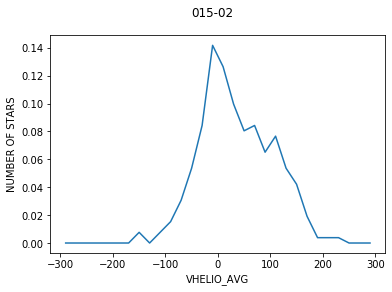

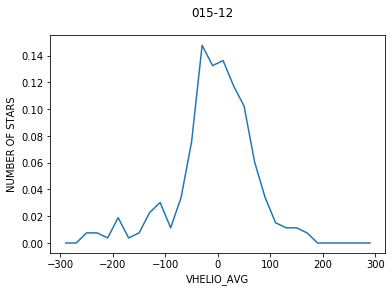

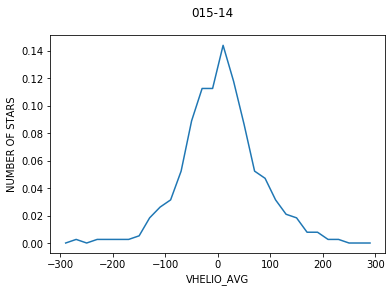

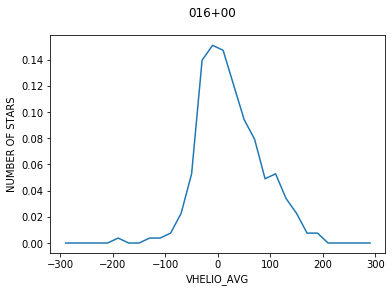

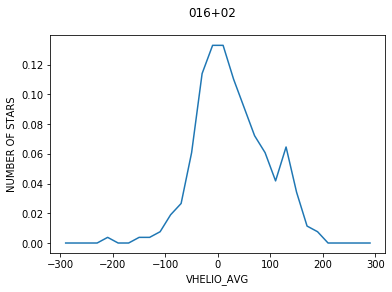

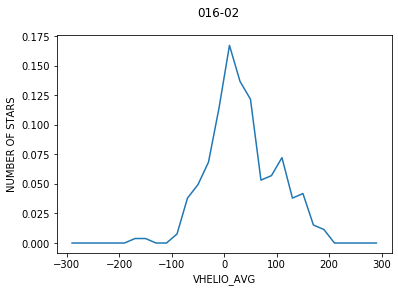

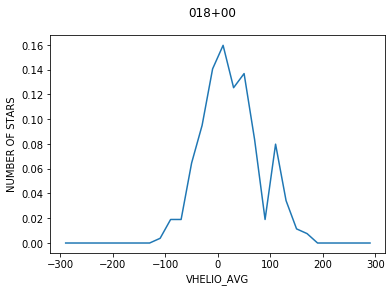

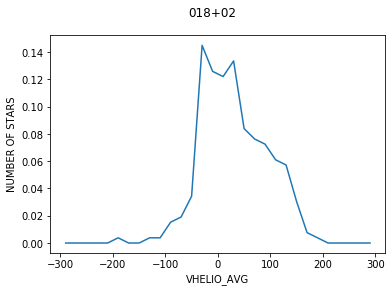

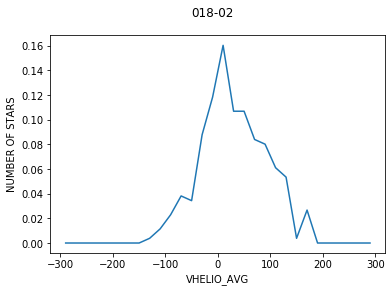

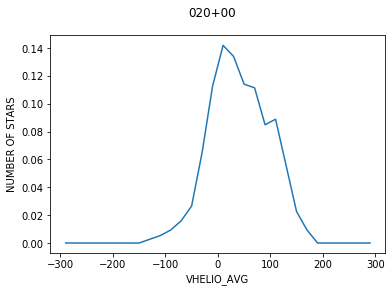

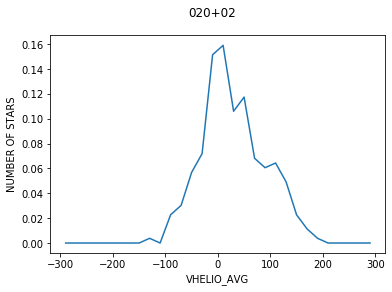

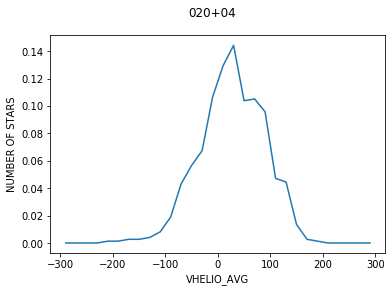

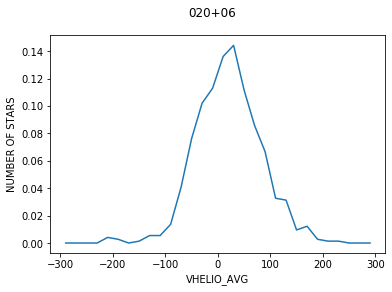

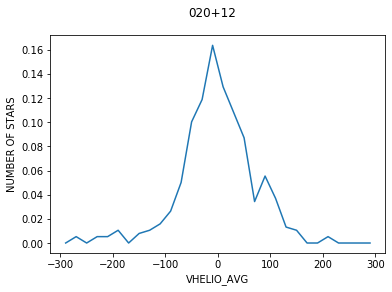

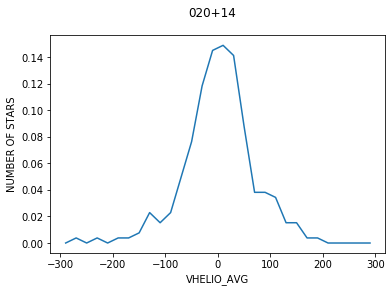

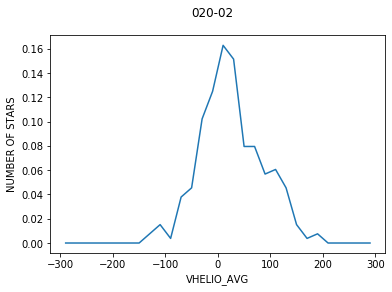

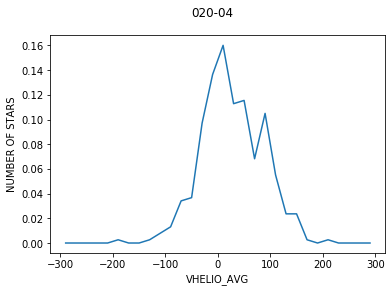

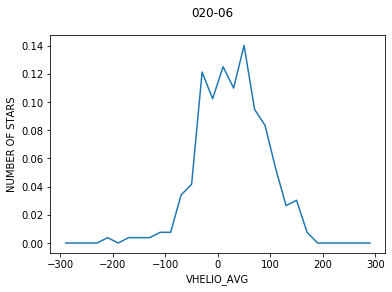

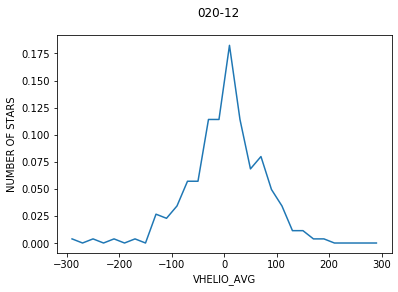

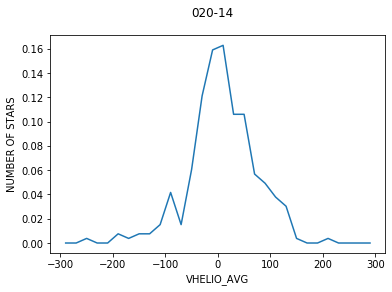

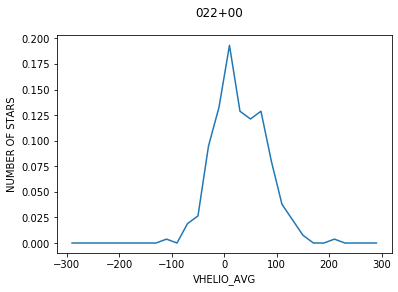

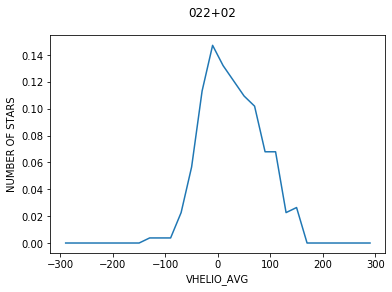

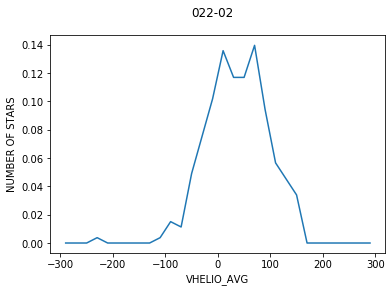

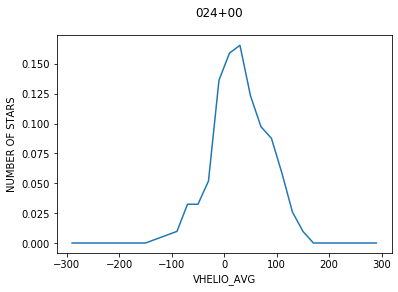

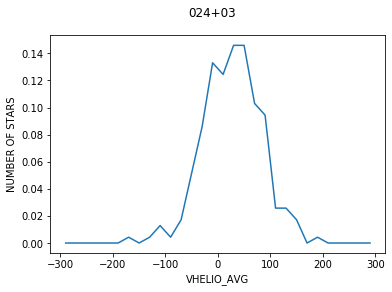

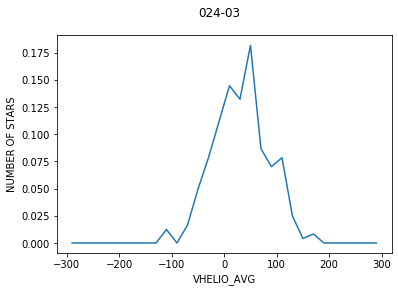

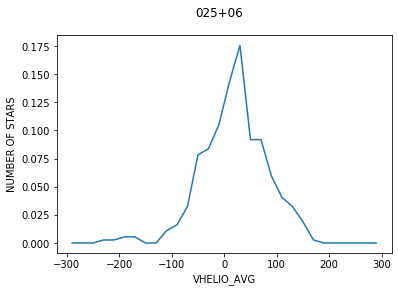

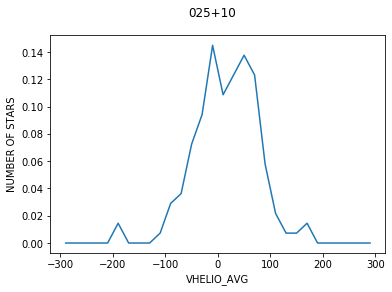

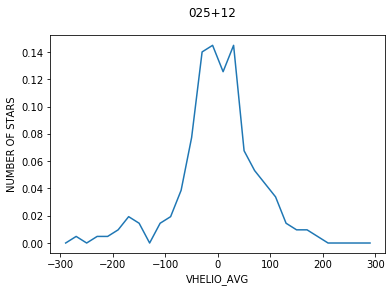

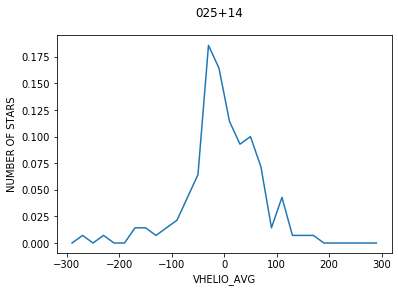

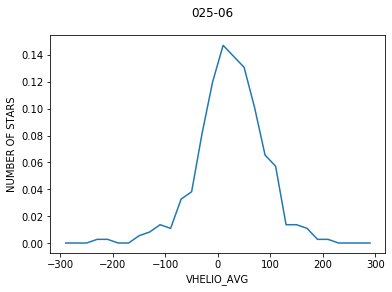

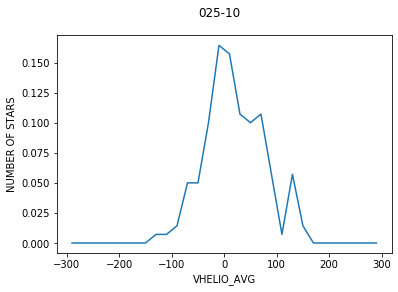

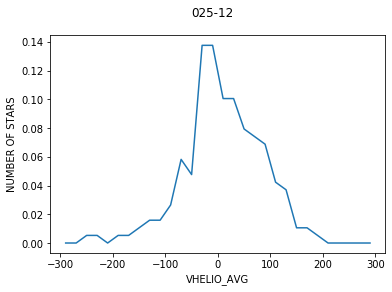

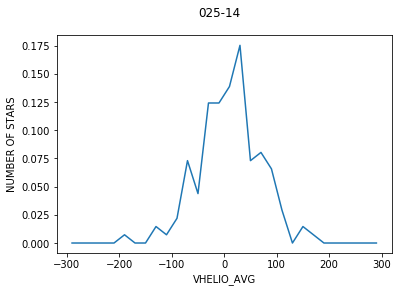

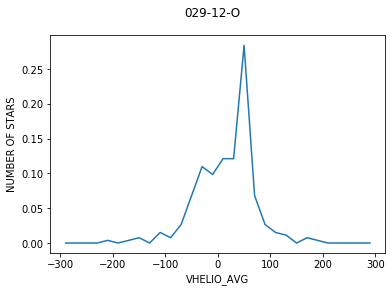

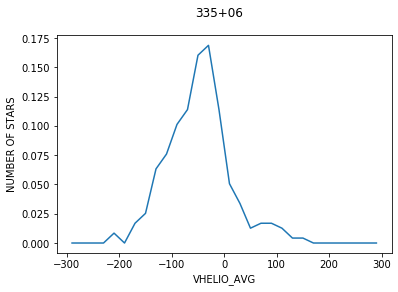

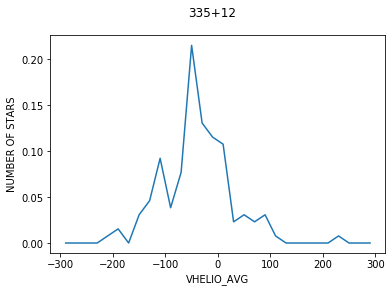

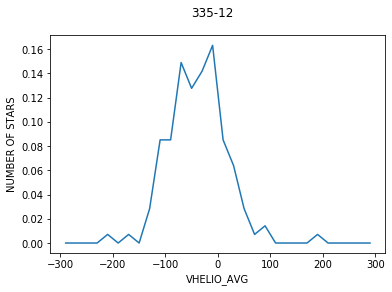

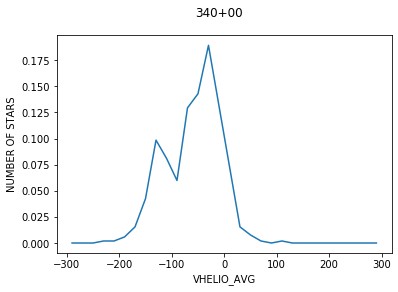

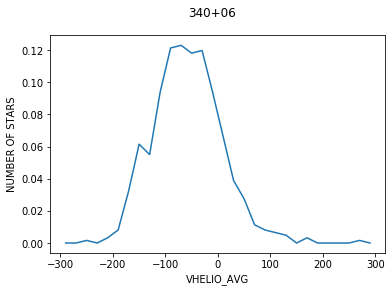

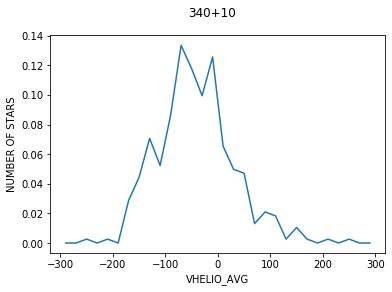

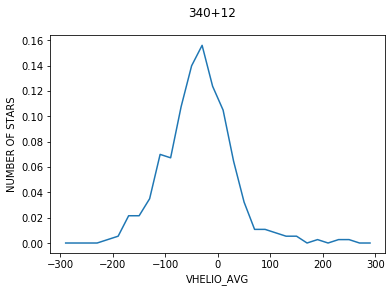

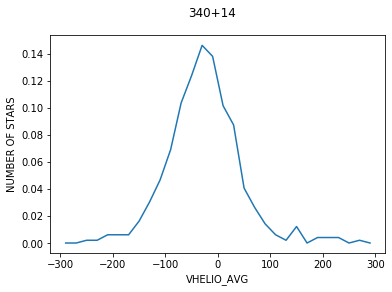

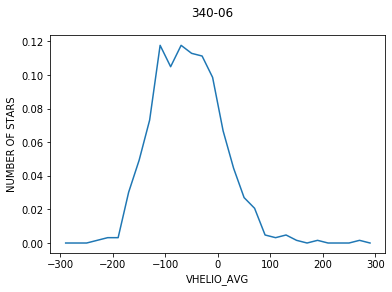

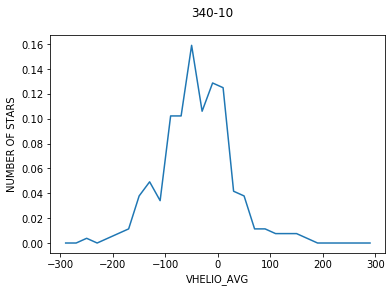

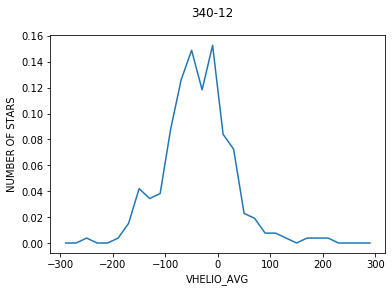

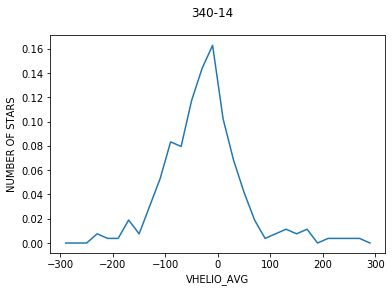

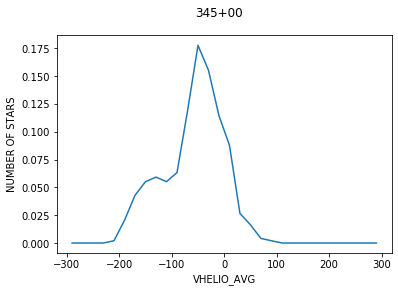

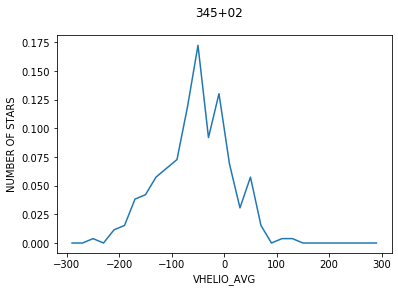

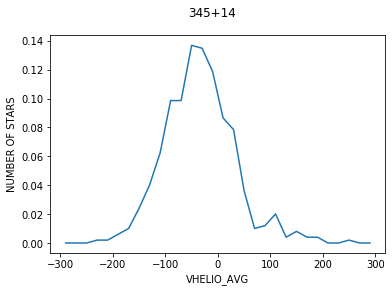

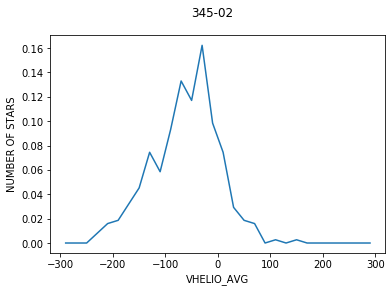

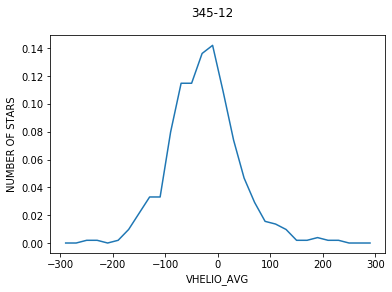

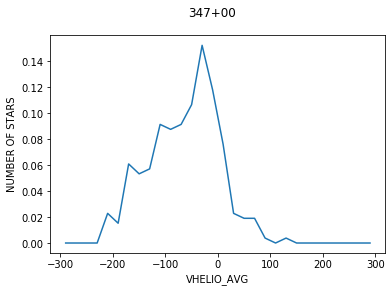

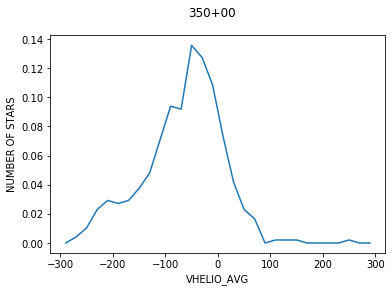

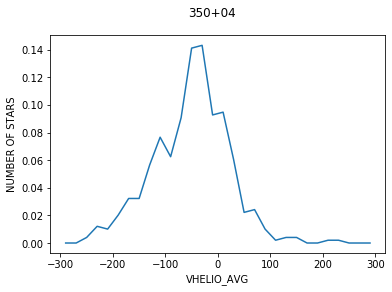

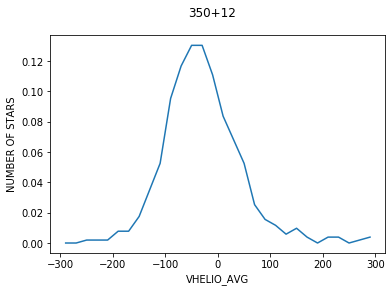

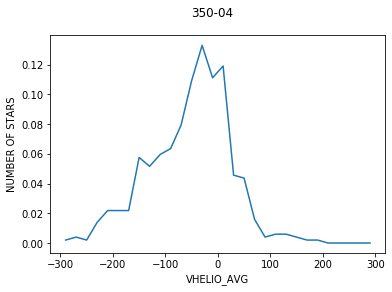

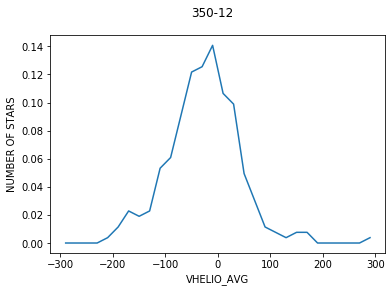

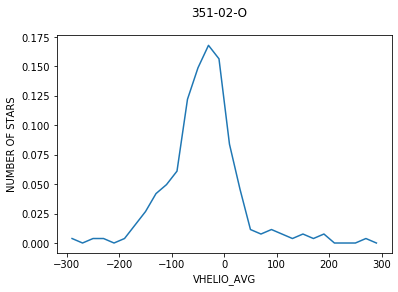

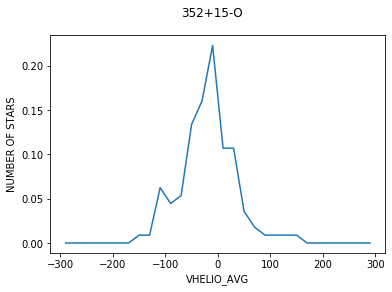

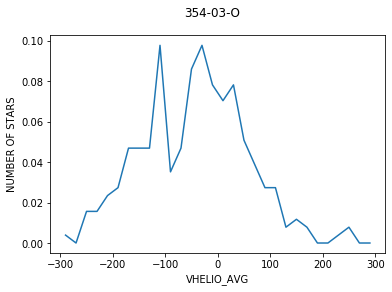

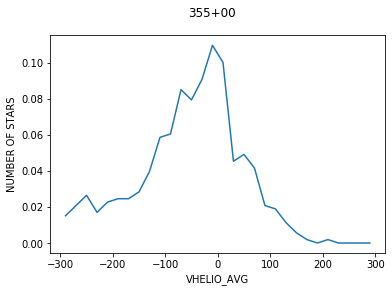

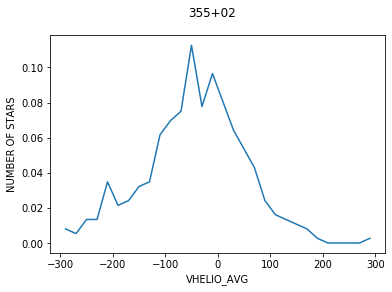

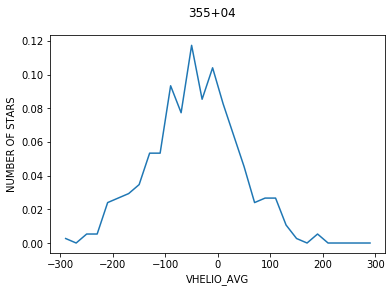

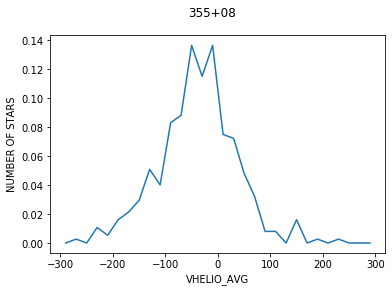

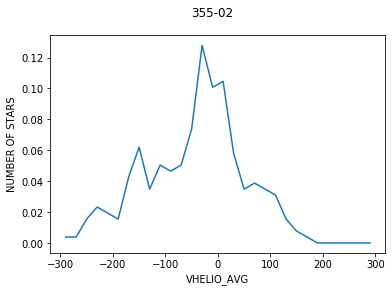

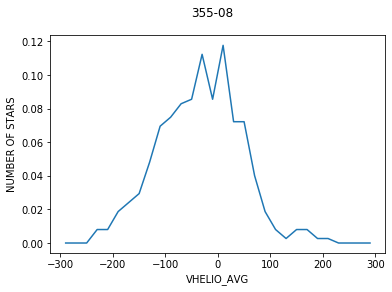

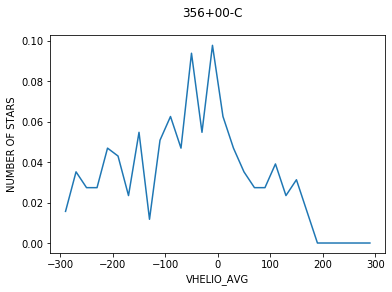

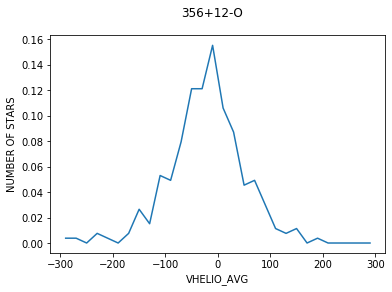

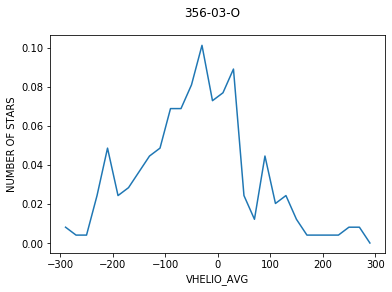

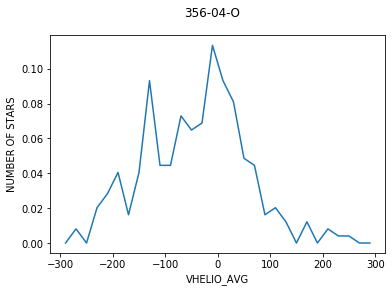

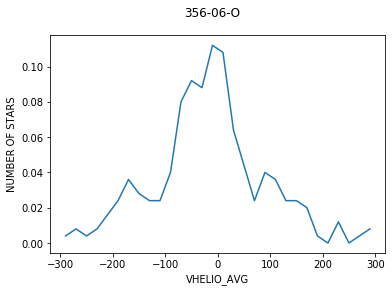

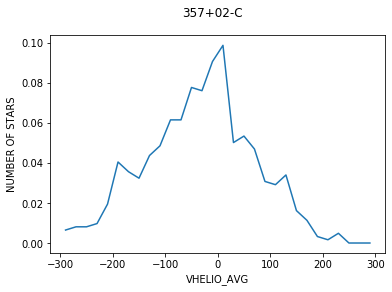

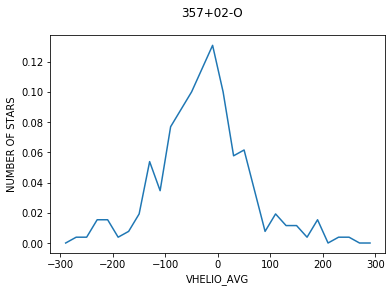

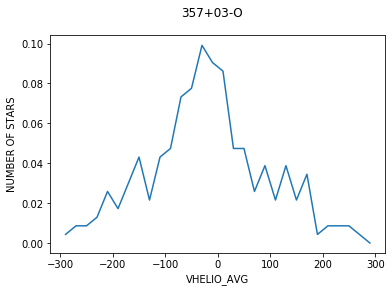

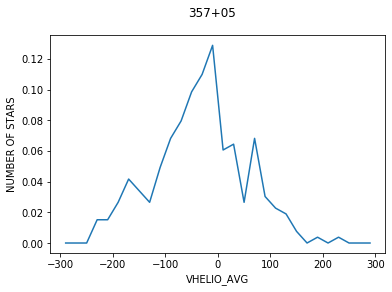

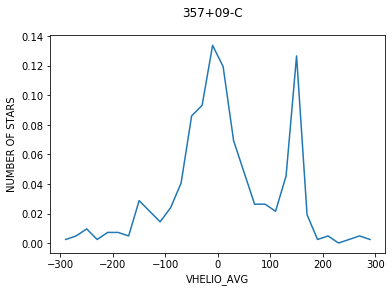

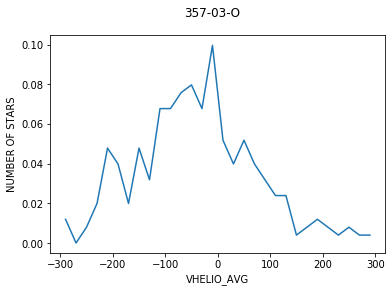

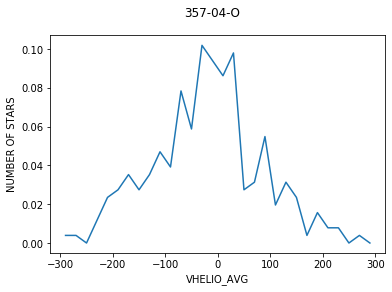

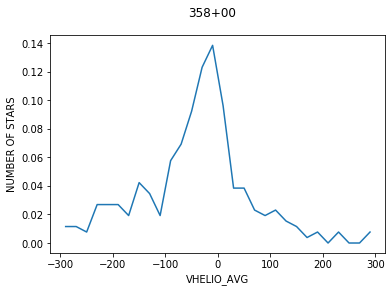

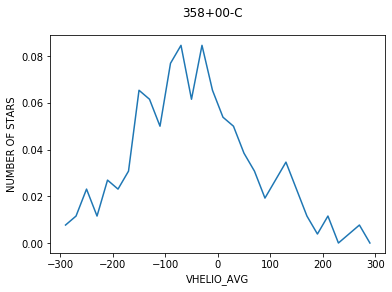

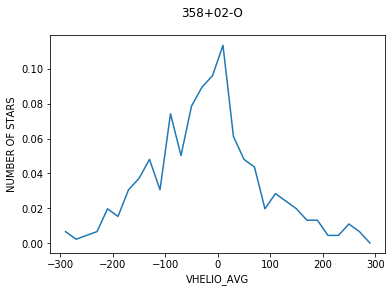

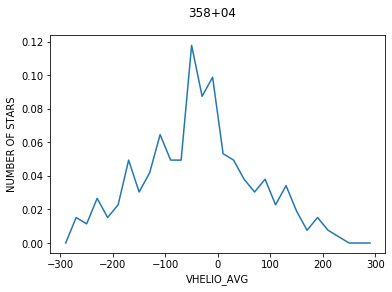

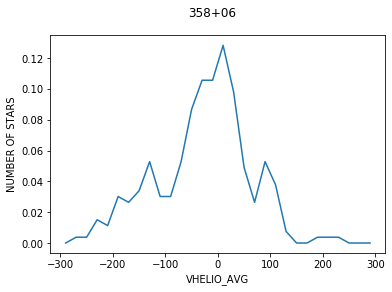

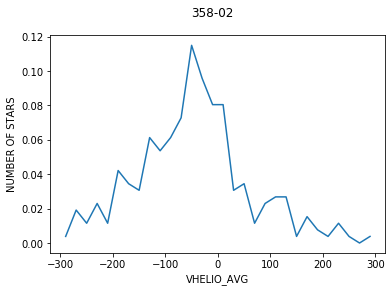

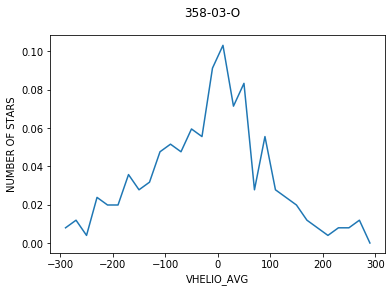

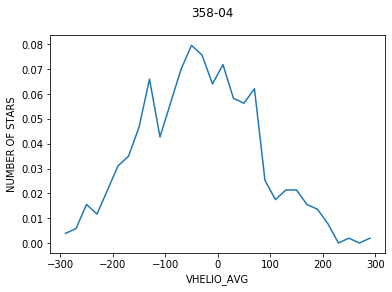

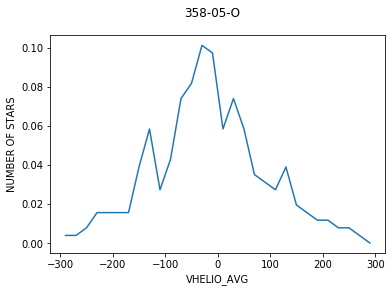

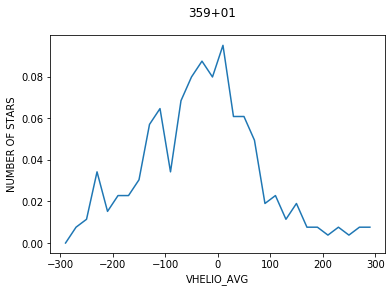

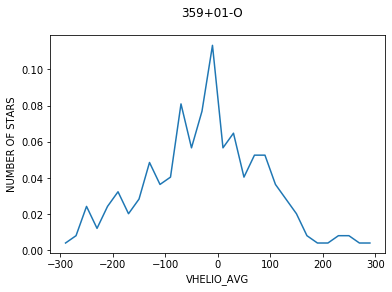

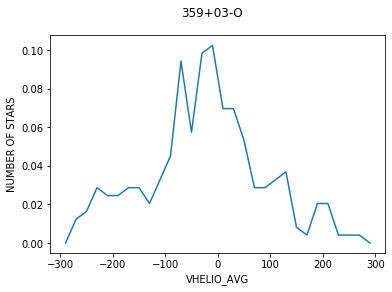

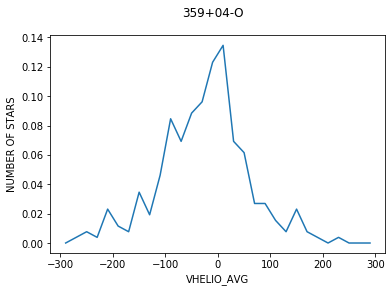

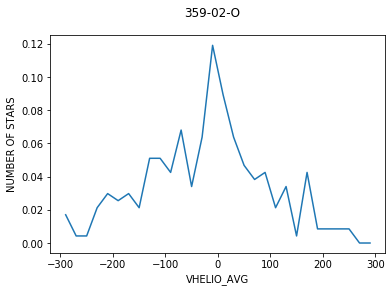

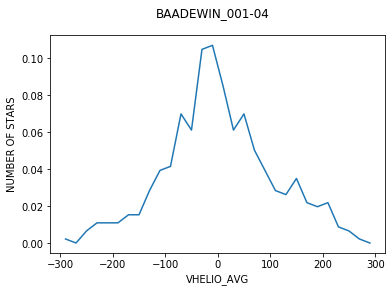

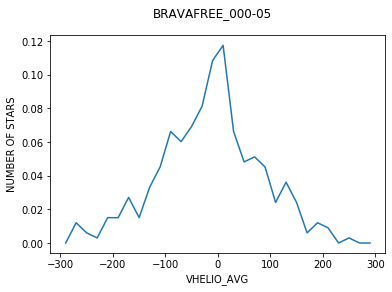

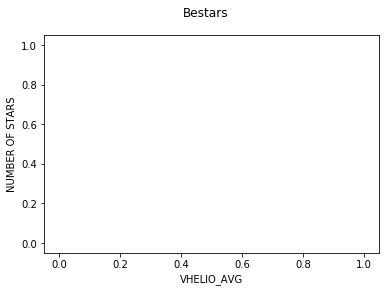

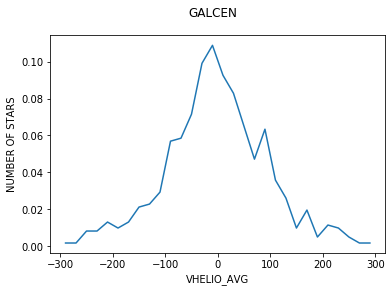

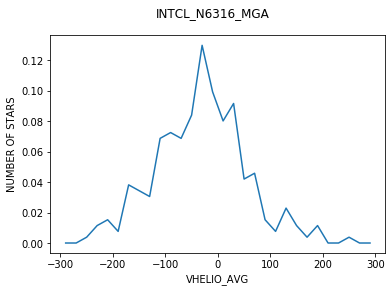

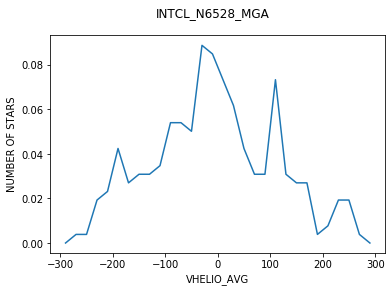

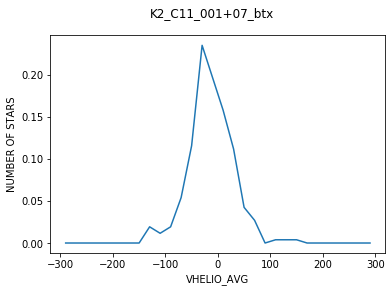

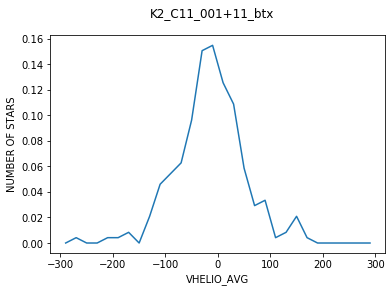

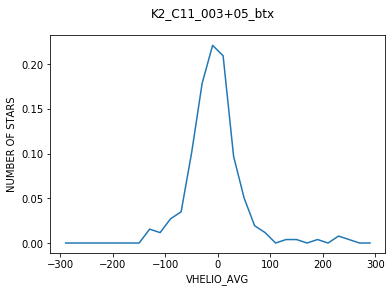

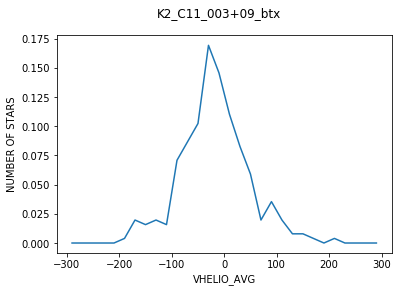

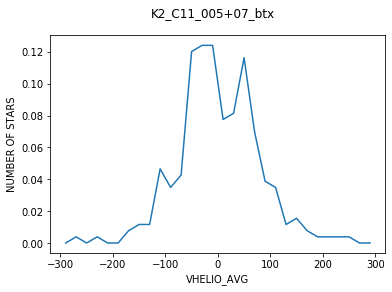

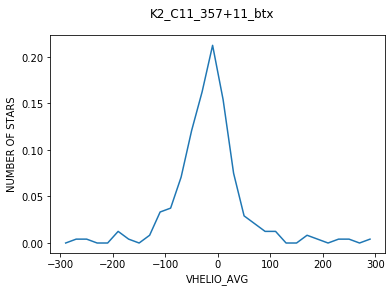

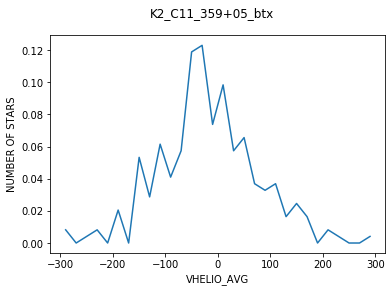

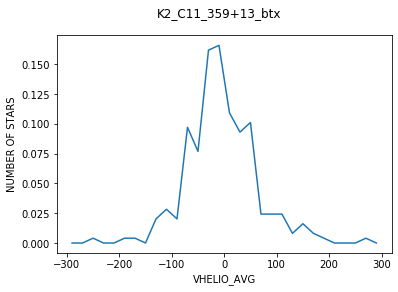

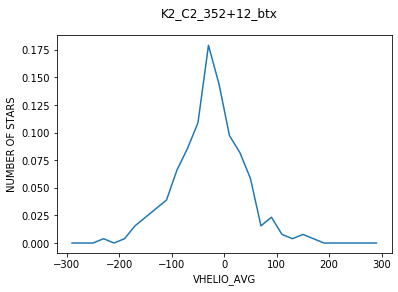

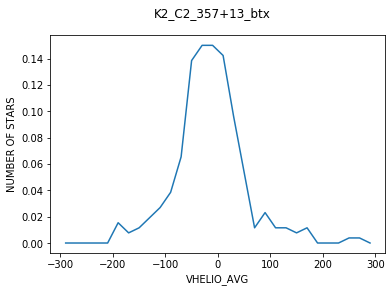

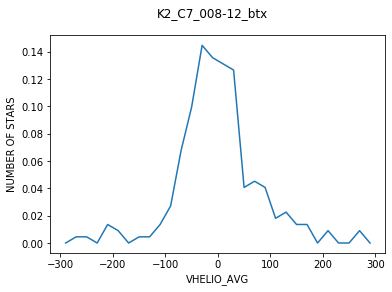

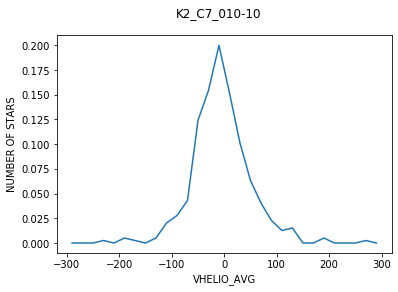

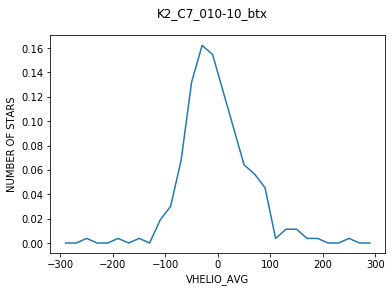

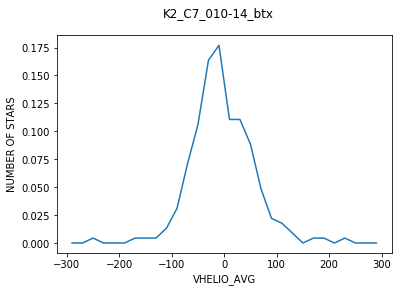

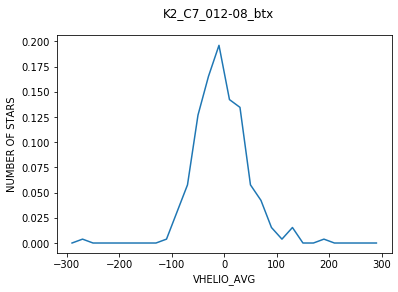

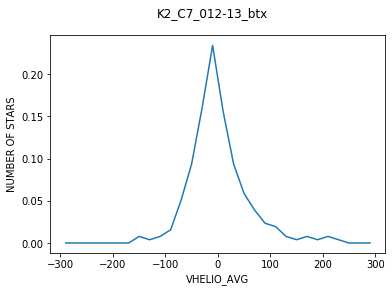

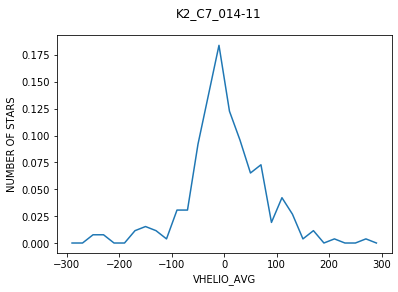

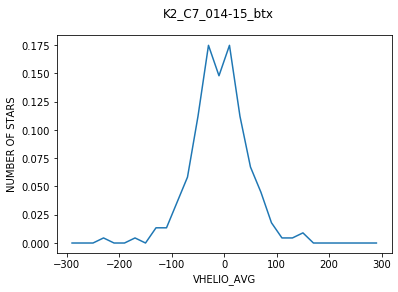

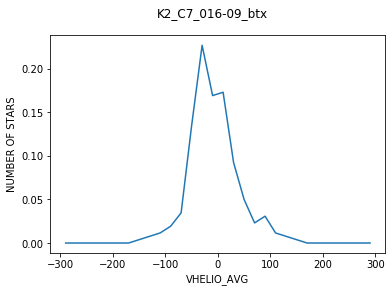

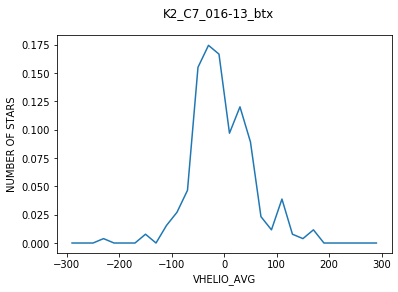

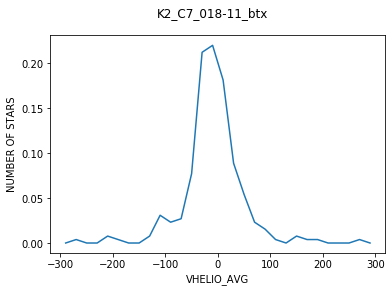

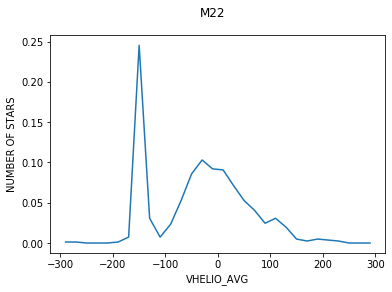

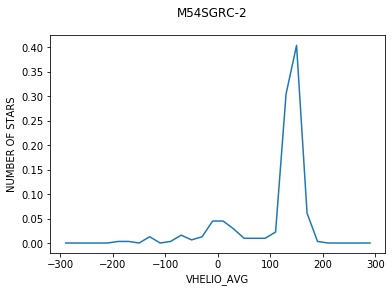

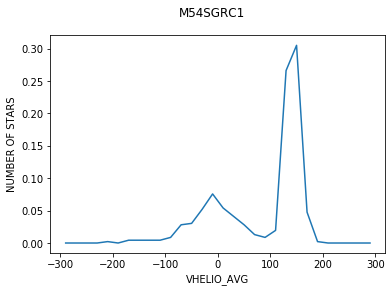

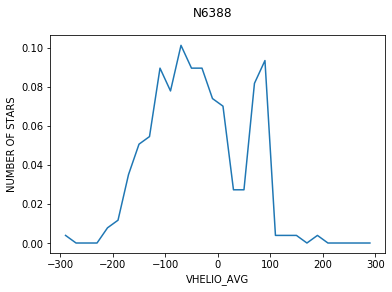

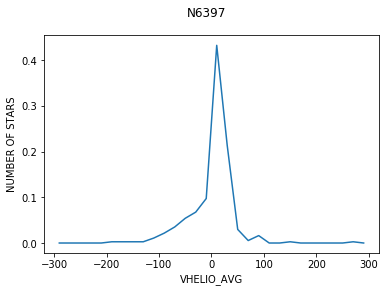

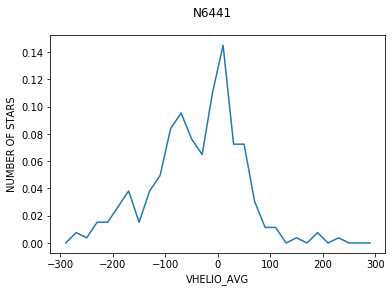

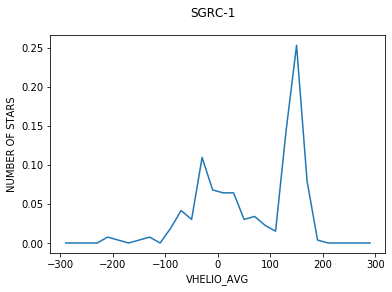

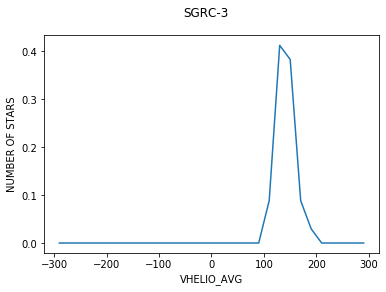

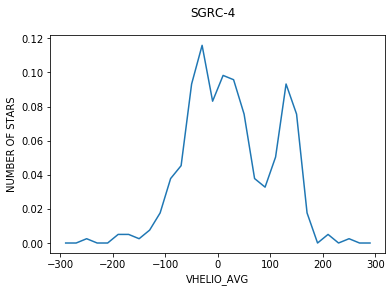

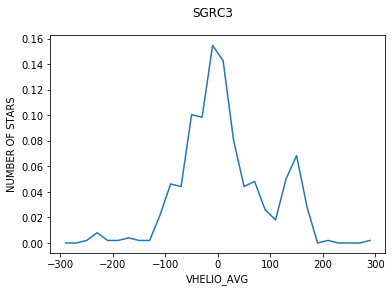

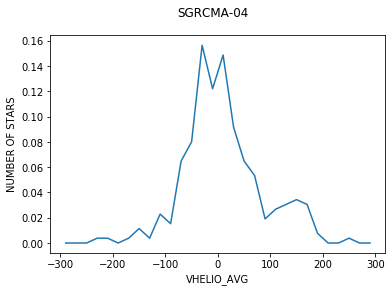

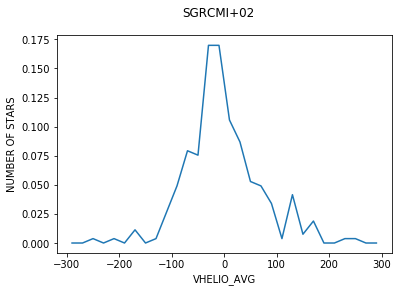

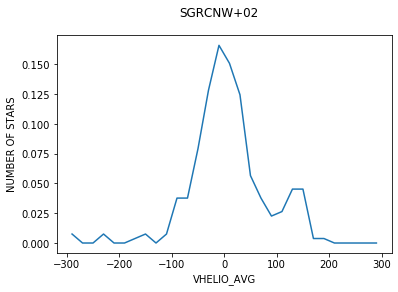

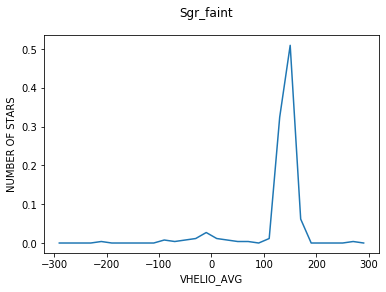

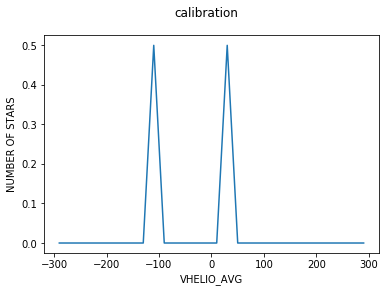

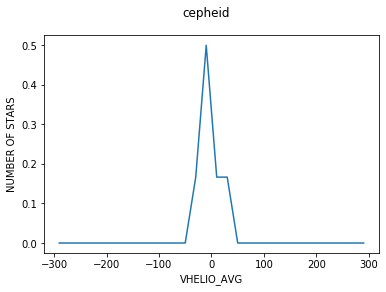

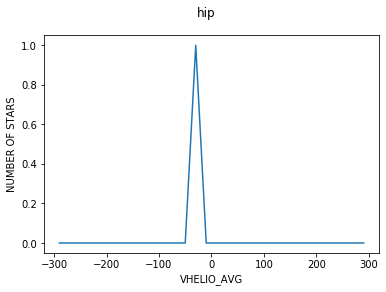

<Figure size 432x288 with 0 Axes>

In [12]:
for i in uniqueFields:
    ind, = np.where(cat["FIELD"]==i)
    newCat = cat[ind]
    x = newCat["VHELIO_AVG"]
    hist,edges=np.histogram(newCat['VHELIO_AVG'],range=(-300,300),bins=30)  
    plt.plot(edges[0:-1]+(edges[1]-edges[0])*0.5,hist/np.sum(hist))    
    plt.suptitle(i)
    plt.xlabel("VHELIO_AVG")
    plt.ylabel("NUMBER OF STARS")
    plt.figure(i)
    plt.show
